# Twitter US Airline Sentiment Analysis

## Description

### Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.


That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

### Data Description

**A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").**

### Data 

* File - `Tweets.csv`
* Path - Google Drive `/content/drive/My Drive/ML/data_sets/sentiment_analysis/airline/Tweets.csv`

###  Data Dictionary

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment 
                                                 
    1.   positive
    2.   negative
    3.   neutral

* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

## Objective

Implement a natural language processing model that pre process data, build bag of words & vocabulary and predict customer sentiment for the airline service 


## Solution Approach - Sentiment_Analysis with NLP


* **Import the necessary libraries**
* **Get & Understand given data**
    * Check for Size/Duplicates/Null values/Sample data
    
* **Feature Elimination** 
    * Remove features not reqd for sentiment analysis prediction solution

* **Exploratory Data Analysis and Insights**
    * Univariate analysis
    * Bivariate analysis 
    * Plot the wordcloud based on the relevant features
    * List all Key meaningful observations


* **Data pre-processing**
    * Prepare the data for analysis
    * Feature Engineering (in any)
    * Missing value Treatment (in any)
    * Text Pre Processing
    * Noise removal (Special character, html tags, numbers, 
stopword removal)

* **Data preparation**
    * Split the target variable and predictors
    * Split the data into train and test 

* **Vectorization**
   * Create Count Vectorizer
   * Create Tf-IDF vectorizer

* **Model building & Model Performance Improvement**
     * Unsupervised Model - Vader Sentiment analysis
     * Naive bayes classifier Model
     * Random Forest classifier Model
     * Build Neural Network Model
     * Performance Tuned Model - Check Performance & Hyper Parameters Tuning
     * Model Performance Evaluation
     * Top 40 Features - Plot the worldcloud based on the most important features
     
* **Actionable Insights & Recommendations**
   * Business recommendations and insights
   * Conclusion and key takeaways


# Twitter US Airline Sentiment Analysis


## Understand Given Data

Load given data `Tweets.csv` to data frame and understand data, data type, data nature,  features incuded, total records,data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and detect outliers 

### Loading necessary libraries for  EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn


In [ ]:
# Google Drive path for Tweets.csv
data_content_path="/content/drive/My Drive/ML/data_sets/sentiment_analysis/airline/Tweets.csv"

time: 1.08 ms (started: 2022-03-02 19:18:20 +00:00)


### Install style & auto time libraries

In [ ]:
# blackcellmagic Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark blackcellmagic"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

time: 56.5 ms (started: 2022-03-02 19:18:20 +00:00)


In [ ]:
# Install ipython-autotime
!pip install ipython-autotime

time: 3.18 s (started: 2022-03-02 19:18:20 +00:00)


**Install contractions for NLP text-pre processing**

In [ ]:
# install contractions for NLP text-pre processing
!pip install contractions

time: 3.49 s (started: 2022-03-02 19:18:24 +00:00)


## **Importing required libraries**

In [ ]:
%load_ext blackcellmagic
%load_ext autotime

import warnings

warnings.filterwarnings("ignore") # Ignore warnings


# Libraries to help with reading and manipulating data

import pandas as pd 
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# to show entire text
pd.set_option('display.max_colwidth', None)

print(f"Numpy Version {np.__version__}")
print(f"Pandas Version {pd.__version__}")


import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.


The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Numpy Version 1.21.5
Pandas Version 1.3.5
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
time: 25.9 ms (started: 2022-03-02 19:18:27 +00:00)


## **Data Summary**

### **Download Data & setup data**

Download data from google drive & save data to dataframe

In [ ]:
# Read given csv data and load to data frame 
data = None
if "google.colab" in sys.modules:
    from google.colab import drive
    # reading csv data given and load to data frame
    drive.mount('/content/drive/', force_remount=True)
    tweets_data = pd.read_csv(data_content_path)
    # copying orignal data so that when changing data we dont lose original
    data = tweets_data.copy()

Mounted at /content/drive/
time: 1.76 s (started: 2022-03-02 19:18:27 +00:00)


### View the first and last 5 rows of the dataset.

In [ ]:
# Check first 5 rows
data.head(5)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                                                                                             text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  tweet_coord              tweet_created tweet_location  \
0         NaN  2015-02-24 11:35:52 -0800            NaN   
1         NaN  2015-02-24 11:15:59 -0800            NaN   
2         NaN  2015-02-24 11:15:48 -0800      Lets Play   
3         NaN  2015-02-24 11:15:36 -0800            NaN   
4         NaN  2015-02-24 11:14:45 -0800            NaN   

                user_timezone  
0  Eastern Time (US & Canada)  
1  Pacific Time (US & Canada)  
2  Central Time (US & Canada)  
3  Pacific Time (US & Canada)  
4  Pacific Time (US & Canada)

time: 29.9 ms (started: 2022-03-02 19:18:29 +00:00)


In [ ]:
# Check last 5 rows
data.tail(5)

tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  \
14635              0   
14636              0   
14637              0   
14638              0   
14639              0   

                                                                                                                                                         text  \
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      tweet_coord              tweet_created tweet_location  \
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636         NaN  2015-02-22 11:59:46 -0800          Texas   
14637         NaN  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800     New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone  
14635                         NaN  
14636                         NaN  
14637                         NaN  
14638  Eastern Time (US & Canada)  
14639                         NaN

time: 19.4 ms (started: 2022-03-02 19:18:29 +00:00)



### Understand the shape of the dataset.

In [ ]:
# Prints Total Rows & Columns
print(f"Given data has total {data.shape[0]} rows and {data.shape[1]} columns")

Given data has total 14640 rows and 15 columns
time: 1.4 ms (started: 2022-03-02 19:18:29 +00:00)


**Observations on data** 

* Given Tweets data has `14640 rows and 15 columns`
* `tweet_id` is like row number, `name` is customer name
* Total 14640 records and 15 features, Where 2 features are almost unique,  `tweet_id` is like row number, ws and 15 columns`
* `tweet_id` is like row number, `name` is unique customer name these 2 features can be dropped for initial data exploration and model building. 
* `airline_sentiment` is dependent feature. Which has 3 possible values. 
  * Positive
  * Negative
  * Neutral


# **Exploratory Data Analysis (EDA)**

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. 


### Checking for missing values

lets check which columns has any null values and count of null values

In [ ]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


# Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(data)

missing count  missing %
negativereason_gold                14608   0.997814
airline_sentiment_gold             14600   0.997268
tweet_coord                        13621   0.930396
negativereason                      5462   0.373087
user_timezone                       4820   0.329235
tweet_location                      4733   0.323292
negativereason_confidence           4118   0.281284

time: 41 ms (started: 2022-03-02 19:18:29 +00:00)


**Observation on missing data**

* `negativereason_gold` - has 99.78% missing data
* `airline_sentiment_gold` - has 99.72% missing data
* `tweet_coord` - has 93.03% missing data
* `negativereason` - has 37.30% missing data
* `user_timezone` - has 32.92% missing data
* `tweet_location` - has 32.32% missing data
* `negativereason_confidence` - has 38.12% missing data

**Most values missing are for negative reasons and wont exists for postive and neutral sentiments**

**None of these fields with missing values will impact our sentiment analysis so no fix required to fill missing values.**



###  Checking for Duplicates Values
lets check for any duplicate values

In [ ]:
# check for any duplicate data
print("Total Duplicte Records : ", len(data[data.duplicated()]))

Total Duplicte Records :  36
time: 31.2 ms (started: 2022-03-02 19:18:29 +00:00)


**Given Data has 36 duplicate records. These duplicate records will not impact sentiment analysis so we dont required to remove diplicate records** 

### Top 10 value(s) & value count(s)

In [ ]:

# Check all category type feature top values 

all_columns=data.select_dtypes(include=['object']).columns.tolist()

print_category_value_counts(data,all_columns)



Column name : airline_sentiment has total 3 unique values

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

--------------------------------------------------

Column name : negativereason has total 10 unique values

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

--------------------------------------------------

Column name : airline has total 6 unique values

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

--------------------------------------------------

Column name : airline_se

**Observation on features top 10 values**

* `airline_sentiment` - target feature has 3 possible values, `Required for sentiment analysis`
* `negativereason` -  has 10 possible values
* `airline` - has 6 possible values 
* `airline_sentiment_gold` -  has lot of missing values, Otherwise 3 possible values
* `name` - tweet account name has 7701 unique values, This column can be dropped, This feature does not provide any value in sentiment analysis

* `negativereason_gold` - has total 13 unique values
* `text` - tweet text has total 14427 unique values, `Required for sentiment analysis`
* `tweet_coord` - location cordinates has lot of missing values and since its location this feature does not provide any value in sentiment analysis
* `tweet_created` -  has total 14247 unique valuesa nd since its data time feature this feature does not provide any value in sentiment analysis
* `tweet_location` - has total 3081 unique values
* `user_timezone` - has total 85 unique values

### Remove features not required for Intial Analysis 

**Removing Columns**

*   tweet_id - Unique Tweet ID, Not add any value 
*   airline_sentiment_gold - 99%+ missing values
*   name - customer tweet account name, Not add any value 
*   negativereason_gold - 99%+ missing values
*   tweet_coord - Location Coordinates
*   tweet_created - Tweet Create Date Time
*   tweet_location - Tweet Location
*   user_timezone - Customer Timezone 




In [ ]:
remove_cols = ["tweet_id", "airline_sentiment_gold", "name","negativereason_gold", "tweet_coord", "tweet_created","tweet_location", "user_timezone"]

# Drop Columns
data.drop(remove_cols, axis=1, inplace=True)


time: 4.21 ms (started: 2022-03-02 19:18:29 +00:00)



### Check the data types of the columns in the dataset.

checking data types and data summary of all columns 

In [ ]:
# All features & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   retweet_count                 14640 non-null  int64  
 6   text                          14640 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 800.8+ KB
time: 15.8 ms (started: 2022-03-02 19:18:29 +00:00)


### Check data summary

All numerical features & summary

In [ ]:
# All numerical features & summary
data.describe().T

count      mean       std    min     25%  \
airline_sentiment_confidence  14640.0  0.900169  0.162830  0.335  0.6923   
negativereason_confidence     10522.0  0.638298  0.330440  0.000  0.3606   
retweet_count                 14640.0  0.082650  0.745778  0.000  0.0000   

                                 50%  75%   max  
airline_sentiment_confidence  1.0000  1.0   1.0  
negativereason_confidence     0.6706  1.0   1.0  
retweet_count                 0.0000  0.0  44.0

time: 29.7 ms (started: 2022-03-02 19:18:29 +00:00)


**Observation data**

After removing feature not required for initial analysis we have 7 features 

* only negativereason & negativereason_confidence has some missing values. Only 2 feature has some missing values because those are negative sentiment related features. Postive and Neutral sentiment will not have any values.
* airline_sentiment_confidence & negativereason_confidence ranges from 0 to 1 
* 75% tweets does not have retweet, Max retweet count is 44 

In [ ]:
print_null_info(data)

missing count  missing %
negativereason                      5462   0.373087
negativereason_confidence           4118   0.281284

time: 26.4 ms (started: 2022-03-02 19:18:29 +00:00)


**Observation on missing data**

Only 2 feature has some missing values because those are negative sentiment related features. Postive and Neutral sentiment will not have any values.

### Dataset with only required features 

**View the first and last 5 rows of the dataset.**

In [ ]:
# first 5 rows
data.head(5)

airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason_confidence         airline  retweet_count  \
0                        NaN  Virgin America              0   
1                     0.0000  Virgin America              0   
2                        NaN  Virgin America              0   
3                     0.7033  Virgin America              0   
4                     1.0000  Virgin America              0   

                                                                                                                             text  
0                                                                                             @VirginAmerica What @dhepburn said.  
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.  
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!  
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse  
4                                                                         @VirginAmerica and it's a really big bad thing about it

time: 12.8 ms (started: 2022-03-02 19:18:29 +00:00)


In [ ]:
# last 5 rows
data.tail(5)

airline_sentiment  airline_sentiment_confidence          negativereason  \
14635          positive                        0.3487                     NaN   
14636          negative                        1.0000  Customer Service Issue   
14637           neutral                        1.0000                     NaN   
14638          negative                        1.0000  Customer Service Issue   
14639           neutral                        0.6771                     NaN   

       negativereason_confidence   airline  retweet_count  \
14635                     0.0000  American              0   
14636                     1.0000  American              0   
14637                        NaN  American              0   
14638                     0.6659  American              0   
14639                     0.0000  American              0   

                                                                                                                                                         text  
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.  
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc  
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10  
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??  
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?

time: 18 ms (started: 2022-03-02 19:18:29 +00:00)




### Univariate analysis & Bivariate analysis 

Visualize all features before any data clean up and understand what data needs cleaning and fixing.

####  Analysis on features
Univariate analysis helps to check data skewness and possible outliers and spread of the data.
Bivariate analysis helps to check data relation between two features.

#### **Creating common methods that can plot univariate chart with histplot, boxplot and barchart %**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="deep",
        height=10,
        kind="scatter",
        hue=hue,
    )



# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


time: 108 ms (started: 2022-03-02 19:18:29 +00:00)


####  ***Analysis on airline_sentiment***

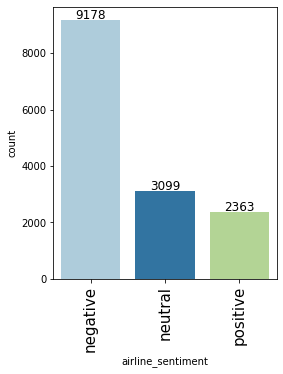

time: 167 ms (started: 2022-03-02 19:18:30 +00:00)


In [ ]:
# Observations on airline_sentiment
labeled_barplot(data, "airline_sentiment")

**Observations on airline_sentiment**

* negative has 9178 values, Negative sentiment has high share 65%+ and dominant in this given data set 
* neutral has 3099 values
* positive has 2363 values




####  ***Analysis on airline_sentiment_confidence***

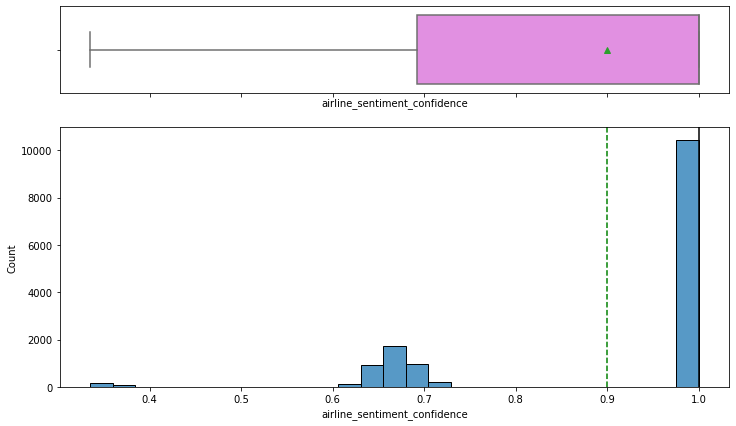

time: 624 ms (started: 2022-03-02 19:18:30 +00:00)


In [ ]:
# Observations on airline_sentiment_confidence
histogram_boxplot(data, "airline_sentiment_confidence")

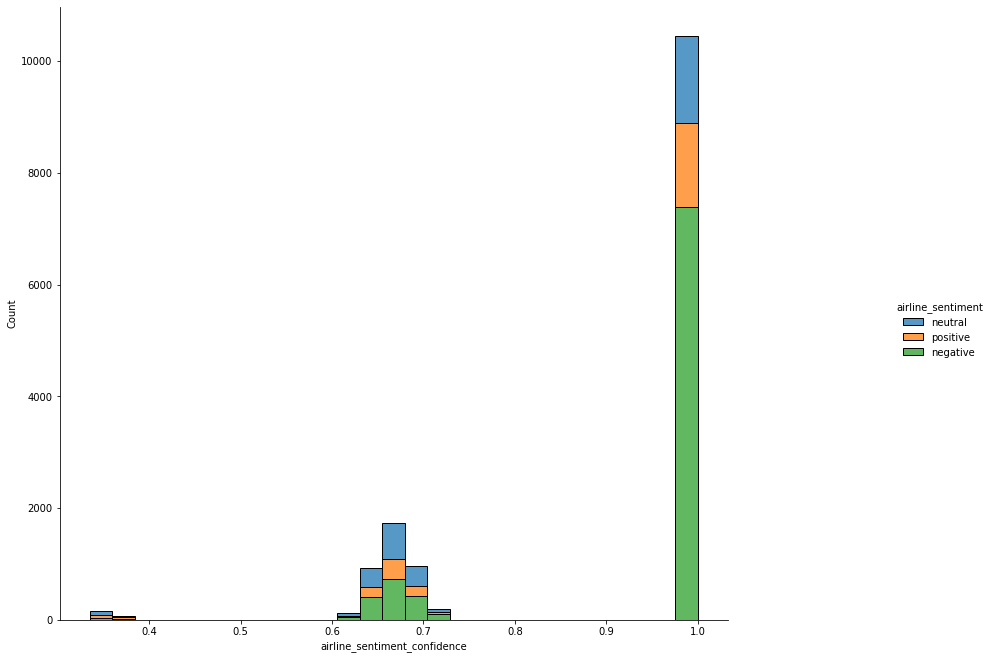

time: 995 ms (started: 2022-03-02 19:18:30 +00:00)


In [ ]:
# check airline_sentiment_confidence and airline_sentiment
ax = sns.displot(data=data, x="airline_sentiment_confidence", hue="airline_sentiment", multiple="stack")
plt.gcf().set_size_inches(15, 10)

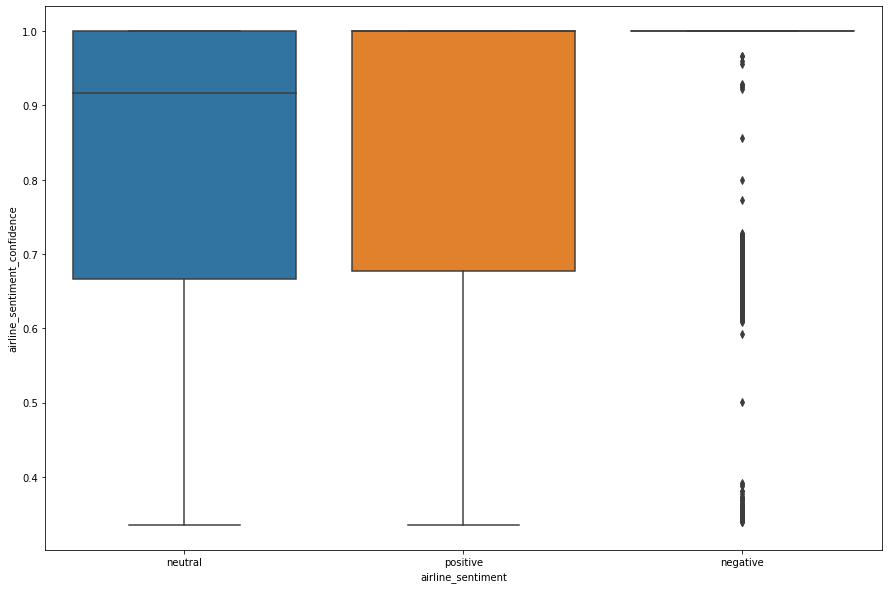

time: 353 ms (started: 2022-03-02 19:18:31 +00:00)


In [ ]:
# check airline_sentiment_confidence and airline_sentiment
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data, y="airline_sentiment_confidence", x="airline_sentiment")

**Observations on airline_sentiment_confidence**

* from graphs we can clearly see 75% tweets has airline_sentiment_confidence score 1
* Mean and Median falls within range of 0.9 to 1 for all tweets
* Postive mean and median score are almost 1
* Neutral Mean and Median falls within range of 0.9 to 1
* Only negative has outliers ranges beyond IQR Ranges 

####  ***Analysis on negativereason***

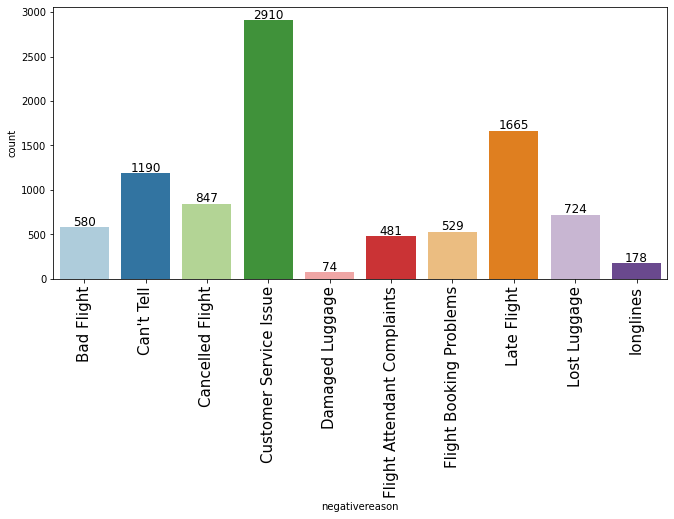

time: 342 ms (started: 2022-03-02 19:18:32 +00:00)


In [ ]:
# Observations on negativereason
labeled_barplot(data, "negativereason")

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
All                              1960    955       1186        2263    2633   
Customer Service Issue            768    199        391         811     681   
Flight Booking Problems           130     44         61         122     144   
Can't Tell                        198    186        159         246     379   
Bad Flight                         87     64         90         104     216   
Cancelled Flight                  246     51        162         189     181   
Late Flight                       249    269        152         453     525   
Flight Attendant Complaints        87     60         38         123     168   
Lost Luggage                      149     57         90         154     269   
Damaged Luggage                    12     11         14          11      22   
longlines                          34     14        

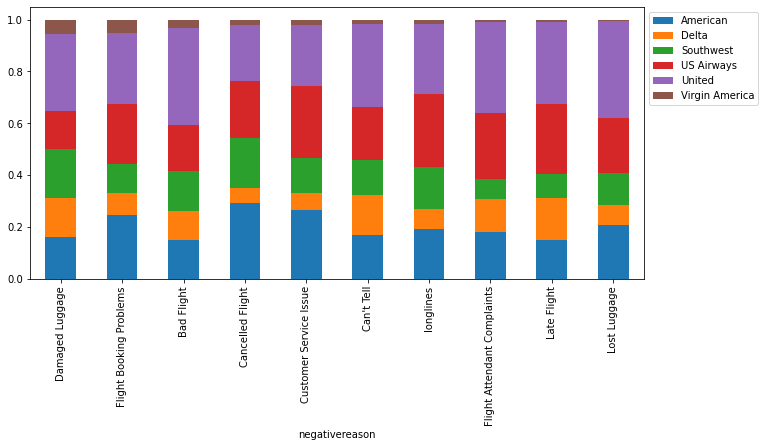

time: 1.09 s (started: 2022-03-02 19:18:32 +00:00)


In [ ]:
# Observations on negativereason vs airline
stacked_barplot(data, "negativereason", "airline")

**Observations on Negative reason**

* 10 possible negative resons 
* Customer service issue is the top neagative reason
* Late Flights, Bad Flight & Lost Luggages are realted to flight services 

**Observations on Negative reason by Airlines**

* United has most negative reasons across all types, Folloed by US Airways 
* Delta, Southwest and Virgin America has least negative reasons 
* Lost luggage, Flight attendent Complaints, Customer service issues are top negative issues reported for both United and US Airways

####  ***Analysis on negativereason_confidence***

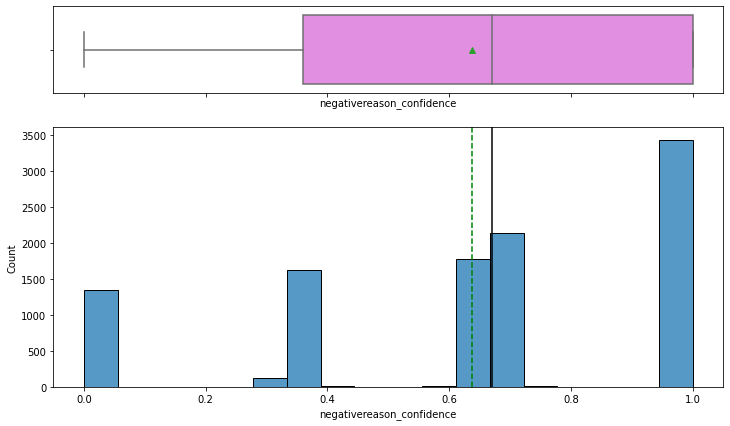

time: 729 ms (started: 2022-03-02 19:18:33 +00:00)


In [ ]:
# Observations on negativereason_confidence
histogram_boxplot(data, "negativereason_confidence")

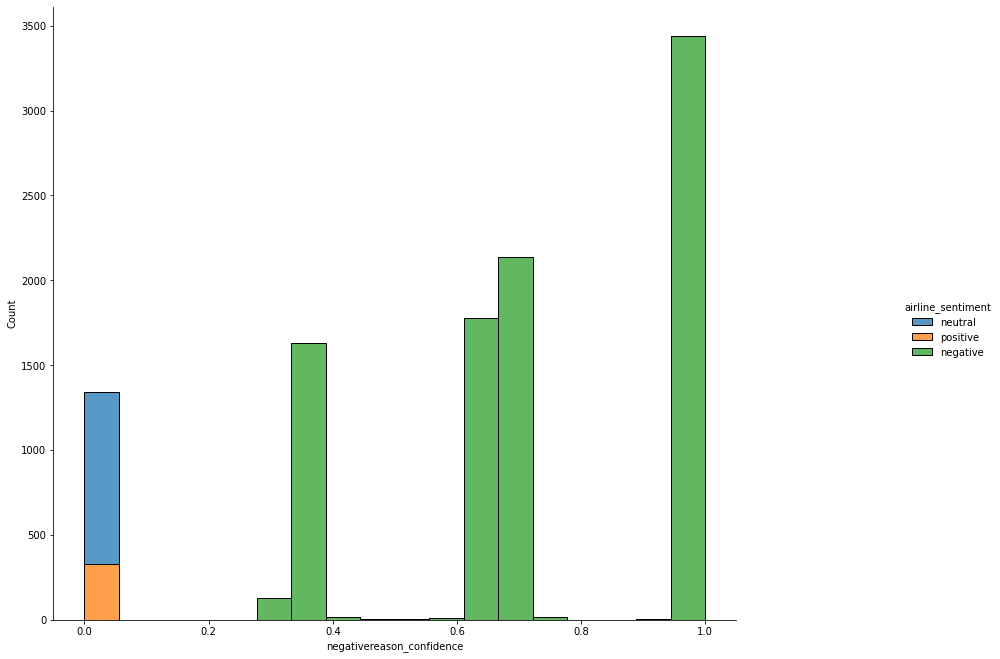

time: 955 ms (started: 2022-03-02 19:18:34 +00:00)


In [ ]:
# check negativereason_confidence and airline_sentiment
ax = sns.displot(data=data, x="negativereason_confidence", hue="airline_sentiment", multiple="stack")
plt.gcf().set_size_inches(15, 10)

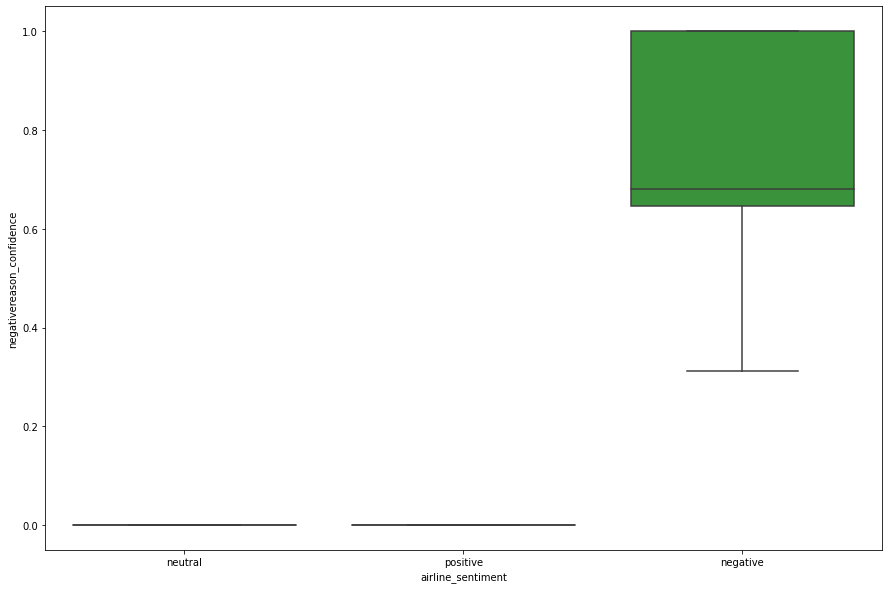

time: 317 ms (started: 2022-03-02 19:18:35 +00:00)


In [ ]:
# check negativereason_confidence and airline_sentiment
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data, y="negativereason_confidence", x="airline_sentiment")

**Observations on negativereason_confidence**

* Negative confidence not exists for positive and neutra - expected.
* mean & median for negative confidence is around 0.7 and overvall falls between 0.65 to 1


####  ***Analysis on airline***

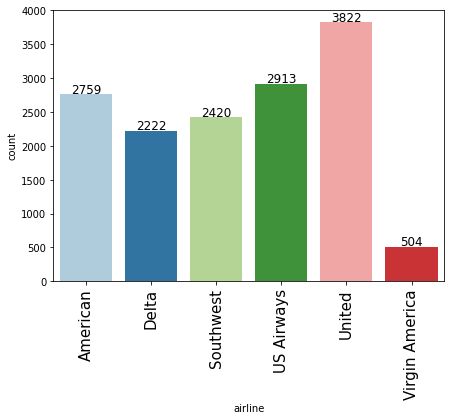

time: 243 ms (started: 2022-03-02 19:18:35 +00:00)


In [ ]:
# Observations on airline
labeled_barplot(data, "airline")

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


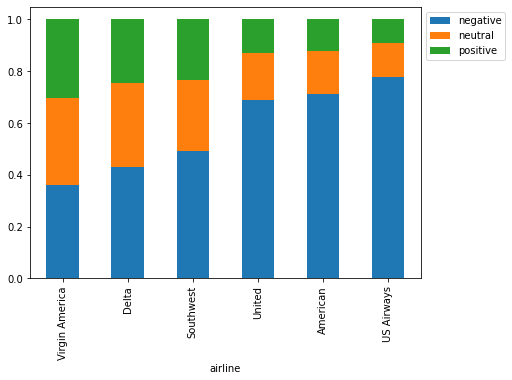

time: 380 ms (started: 2022-03-02 19:18:36 +00:00)


In [ ]:
# Observations on airline vs airline_sentiment
stacked_barplot(data, "airline", "airline_sentiment")

**Observations on airline**

* 6 airlines has tweets
* United and US Airways has most tweets compared to other airlines
* United, American and US Airways has most number of negative tweets 
* Virgin America, Delta & Southwest has maximun share of postive and neutral sentiments compared to other airlines 

####  ***Analysis on retweet_count***

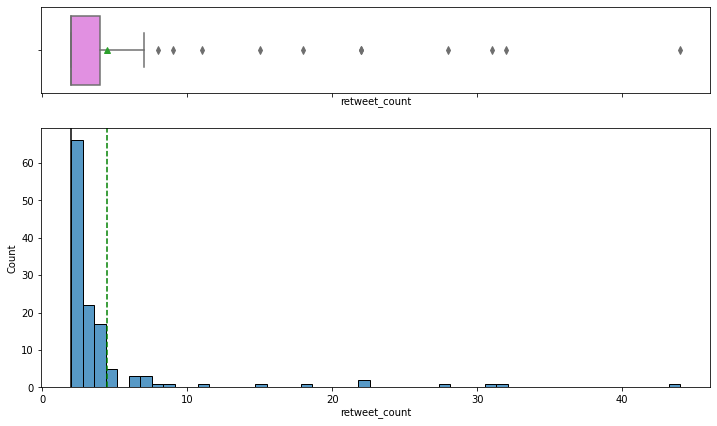

time: 748 ms (started: 2022-03-02 19:18:36 +00:00)


In [ ]:
# Observations on retweet_count
histogram_boxplot(data[data["retweet_count"]>1], "retweet_count")

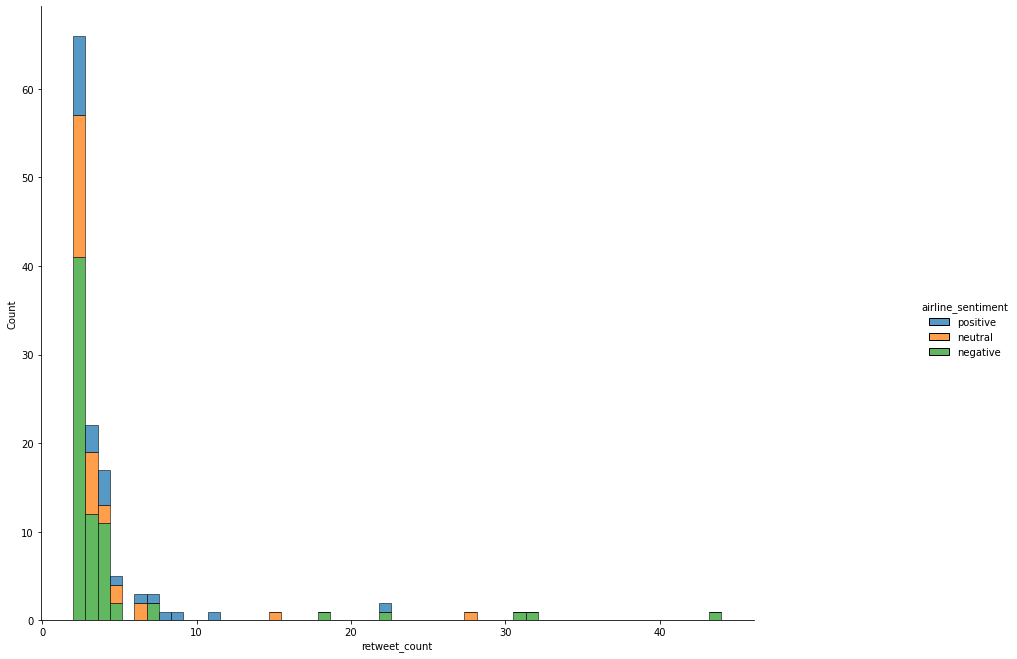

time: 1.3 s (started: 2022-03-02 19:18:37 +00:00)


In [ ]:
# check retweet_count and airline_sentiment
ax = sns.displot(data=data[data["retweet_count"]>1], x="retweet_count", hue="airline_sentiment", multiple="stack")
plt.gcf().set_size_inches(15, 10)

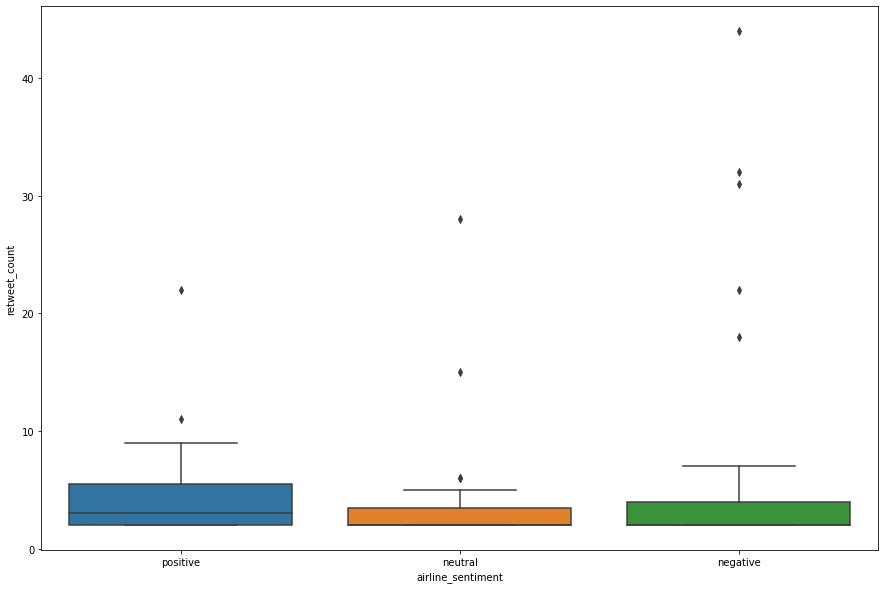

time: 334 ms (started: 2022-03-02 19:18:38 +00:00)


In [ ]:
# check retweet_count and airline_sentiment
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data[data["retweet_count"]>1], y="retweet_count", x="airline_sentiment")

In [ ]:
#check few data with high retweet counts
data[data["retweet_count"]>=10]

airline_sentiment  airline_sentiment_confidence negativereason  \
5607           positive                        1.0000            NaN   
7027           negative                        0.6541     Can't Tell   
7111            neutral                        0.6588            NaN   
7115           negative                        0.6940     Can't Tell   
7132           negative                        1.0000     Can't Tell   
7453           positive                        1.0000            NaN   
9999            neutral                        0.6593            NaN   
11582          negative                        1.0000     Can't Tell   
11596          negative                        1.0000    Late Flight   

       negativereason_confidence     airline  retweet_count  \
5607                         NaN   Southwest             22   
7027                      0.3367       Delta             18   
7111                      0.0000       Delta             15   
7115                      0.6940       Delta             22   
7132                      1.0000       Delta             31   
7453                         NaN       Delta             11   
9999                         NaN  US Airways             28   
11582                     0.6608  US Airways             32   
11596                     1.0000  US Airways             44   

                                                                                                                                               text  
5607                                                                                 @SouthwestAir beautiful day in Seattle! http://t.co/iqu0PPVq2S  
7027             Just in case you needed confirmation that "on fleek" is dead &amp; gone. RT @JetBlue: Our fleet's on fleek. http://t.co/G4O6yX7TMJ  
7111                                                                               X____x RT @JetBlue: Our fleet's on fleek. http://t.co/Y39YzDpBvU  
7115                                                                          can you not? RT @JetBlue Our fleet's on fleek. http://t.co/413GiAL0yl  
7132                                       STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY. RT @JetBlue: Our fleet's on fleek. http://t.co/Fd2TNYcTrB  
7453        @JetBlue what a great experience on flight from SFO to JFK; seats, service, food, everything is top quality. I will be back. Very soon!  
9999                                                                            @USAirways with this livery back in the day. http://t.co/EEqWVAMmiy  
11582   @USAirways of course never again tho . Thanks for tweetin ur concern but not Doin anythin to fix what happened. I'll choose wiser next time  
11596  @USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)

time: 15.4 ms (started: 2022-03-02 19:18:38 +00:00)


**Observations on retweet_count**

* only very few tweets has retweet counts 
* most retweet happens for negative sentiment 
* top retweets are negative cant tell reason type 
* some postive retweet happens for flight experiece and food served 

####  ***Analysis on text***

Generate Tweet Length and words count

In [ ]:
def word_count(string):
    # Here we are removing the spaces from start and end,
    # and breaking every word whenever we encounter a space
    # and storing them in a list. The len of the list is the
    # total count of words.    
    return(len(string.strip().split(" ")))

# Let's get the length of the messages
data['tweet_length'] = data['text'].apply(len)

# Let's get the length of the messages
data['tweet_words'] = data['text'].apply(word_count)

time: 39.5 ms (started: 2022-03-02 19:18:38 +00:00)


In [ ]:
# Check Data stats after adding new features 
data.describe().T

count        mean        std     min      25%  \
airline_sentiment_confidence  14640.0    0.900169   0.162830   0.335   0.6923   
negativereason_confidence     10522.0    0.638298   0.330440   0.000   0.3606   
retweet_count                 14640.0    0.082650   0.745778   0.000   0.0000   
tweet_length                  14640.0  103.822063  36.277339  12.000  77.0000   
tweet_words                   14640.0   17.795492   6.943015   2.000  13.0000   

                                   50%    75%    max  
airline_sentiment_confidence    1.0000    1.0    1.0  
negativereason_confidence       0.6706    1.0    1.0  
retweet_count                   0.0000    0.0   44.0  
tweet_length                  114.0000  136.0  186.0  
tweet_words                    19.0000   23.0   36.0

time: 34.9 ms (started: 2022-03-02 19:18:38 +00:00)


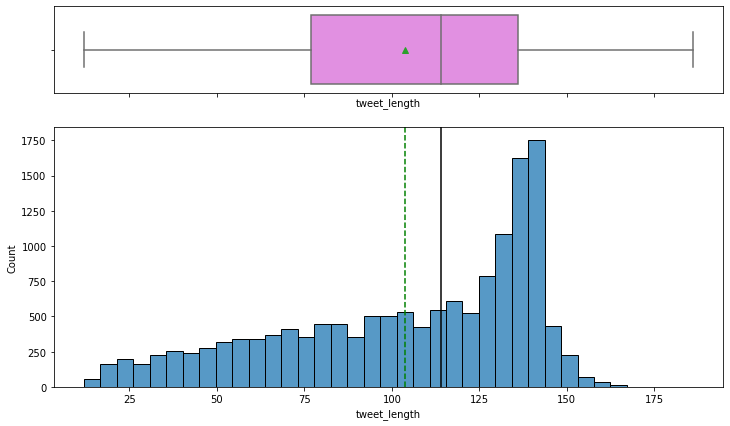

time: 774 ms (started: 2022-03-02 19:18:38 +00:00)


In [ ]:
# Observations on text - tweet length
histogram_boxplot(data, "tweet_length")

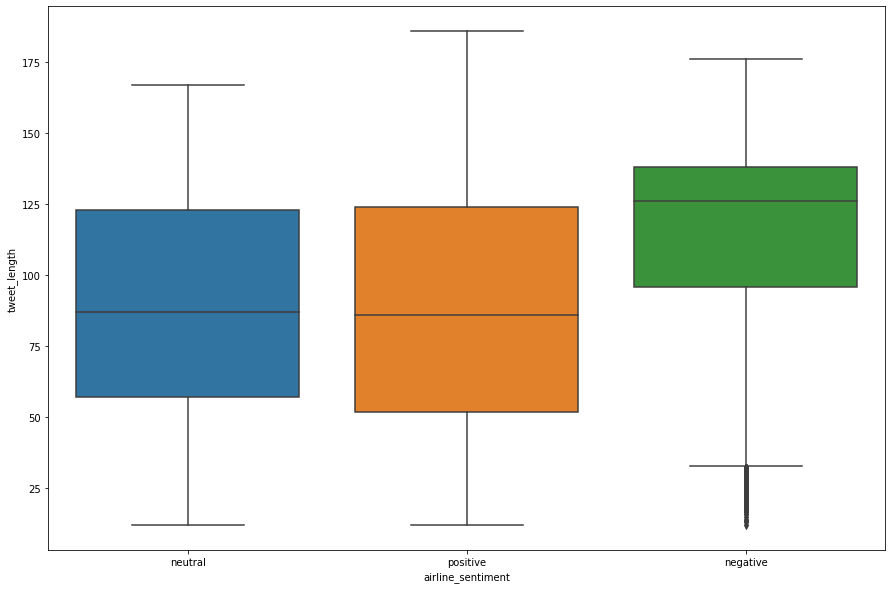

time: 362 ms (started: 2022-03-02 19:18:39 +00:00)


In [ ]:
# check text - tweet length and airline_sentiment
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data, y="tweet_length", x="airline_sentiment")

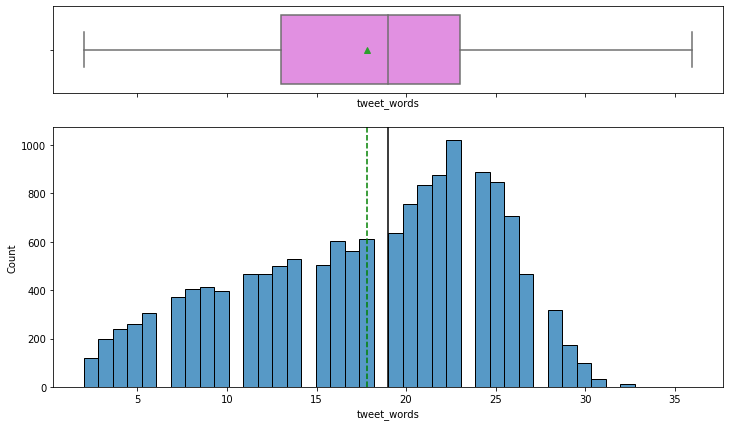

time: 863 ms (started: 2022-03-02 19:18:40 +00:00)


In [ ]:
# Observations on text - tweet word count
histogram_boxplot(data, "tweet_words")

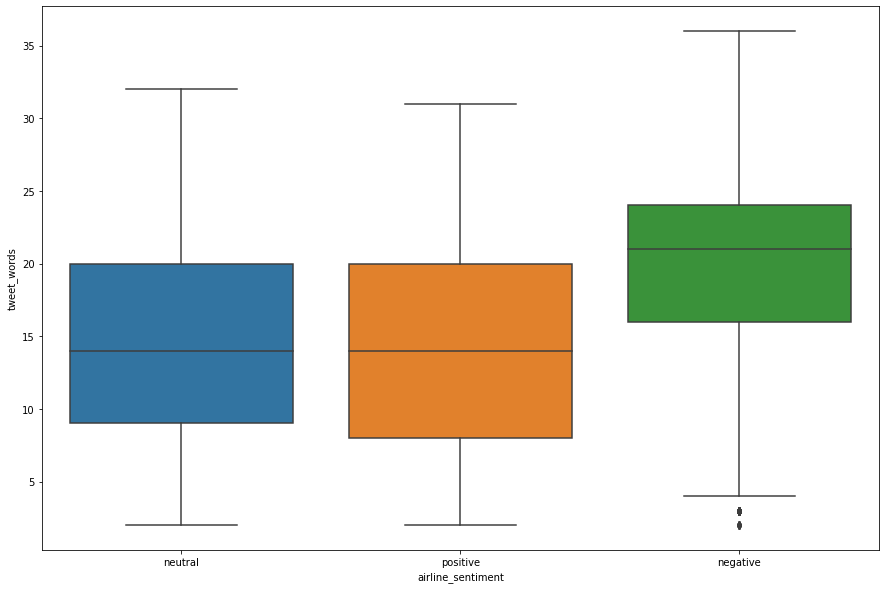

time: 351 ms (started: 2022-03-02 19:18:40 +00:00)


In [ ]:
# check text - tweet words  and airline_sentiment
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data, y="tweet_words", x="airline_sentiment")

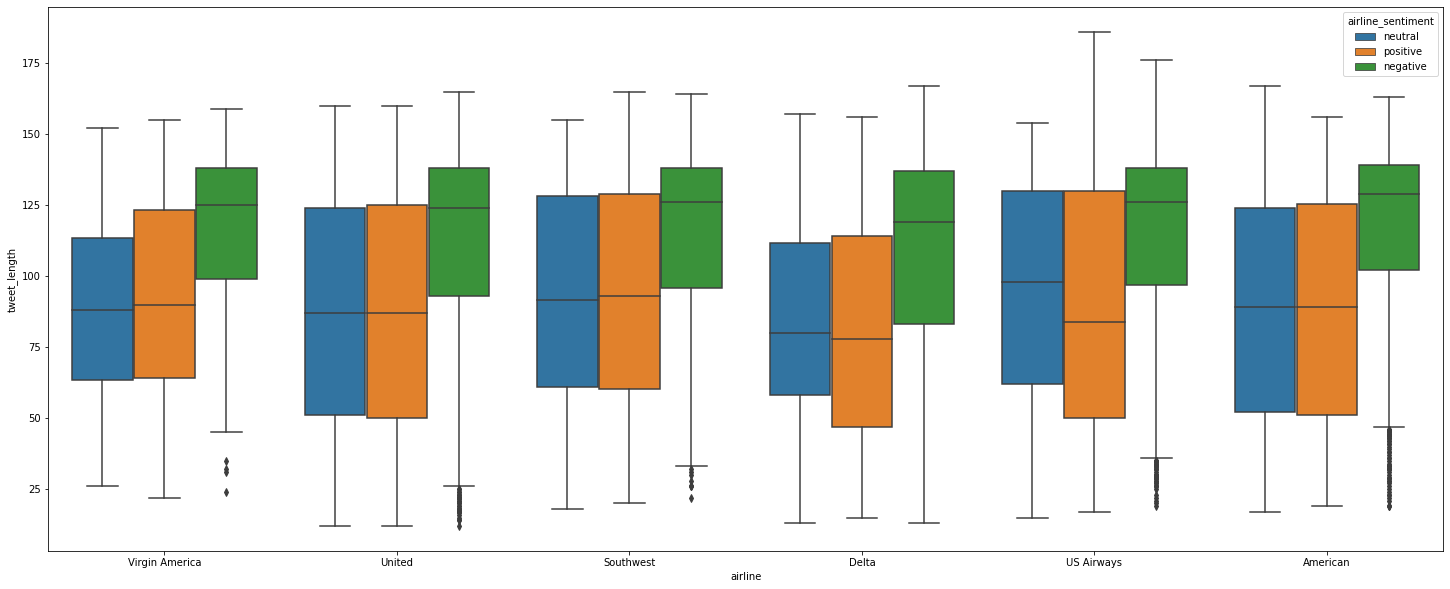

time: 855 ms (started: 2022-03-02 19:18:41 +00:00)


In [ ]:
# check text - tweet length and airline
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=data, y="tweet_length", x="airline",hue="airline_sentiment")

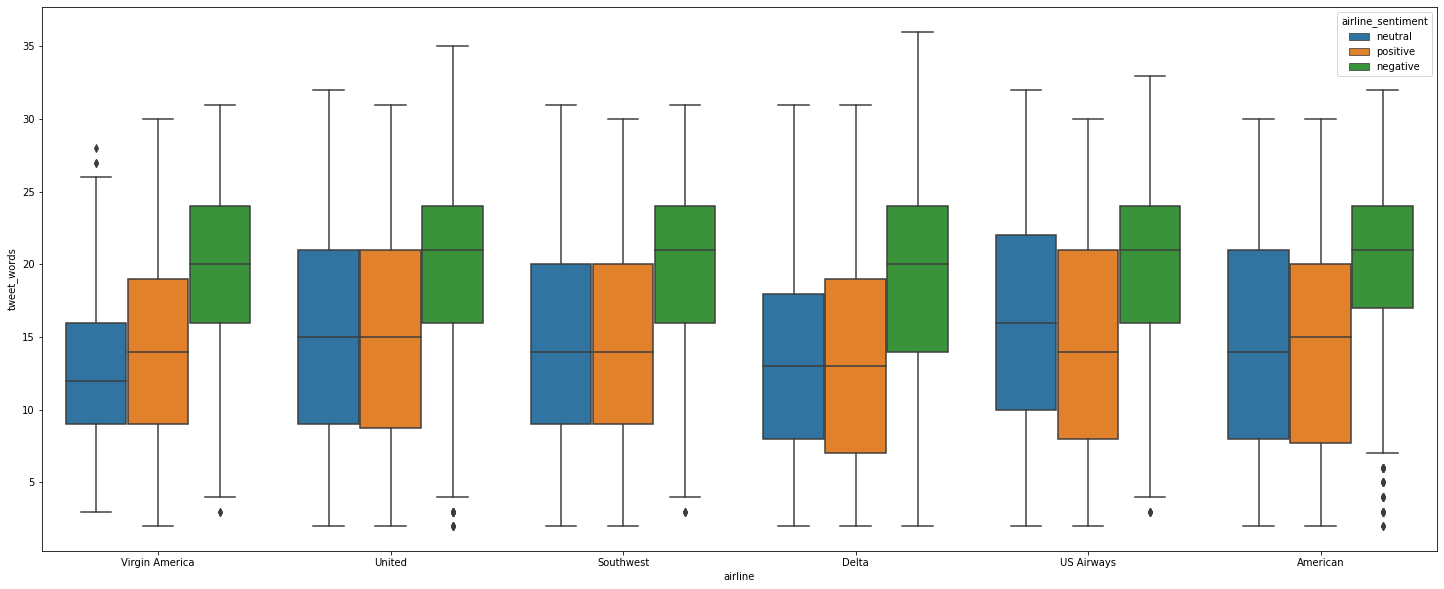

time: 839 ms (started: 2022-03-02 19:18:42 +00:00)


In [ ]:
# check text - tweet words and airline
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=data, y="tweet_words", x="airline",hue="airline_sentiment")

**Observations on text**

Critical feature for sentiment analysis 

1.   Negative tweets has more words and tweet length compared to postive and neutral
2.   On Avg Every tweet has 20 words and above for negative tweets
3.   Postive and Neutral has avg 10 to 15 words 
4.   Only Negtive tweets has outliers in word count, Some negative tweet has only 2 words 



### **Word cloud graph of tweets for positive, negative & neutral sentiment**

Create custom stopwords list, Removing some words related to negative sentiment. These negative stopwords will help to identify tweet sentiment later.

Total we have 146 stopwords 

In [ ]:
from nltk.corpus import stopwords    
englist_stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

final_custom_stopwords = list(set(englist_stopwords) - set(customlist))   

print("Total Custom StopWords for this application : ", len(final_custom_stopwords))

Total Custom StopWords for this application :  146
time: 9.65 ms (started: 2022-03-02 19:18:43 +00:00)


#### **Plot Wordcloud Features**

Common method to plot Wordcloud since we reuse this Wordcloud feature multiple times later

* Plots Wordcloud top words
* Plots top words and word counts

In [ ]:
import wordcloud
import collections
import matplotlib.cm as cm
from matplotlib import rcParams

def show_wordcloud(text, title, countBarChart=True):
    """
    Plot Top words as Wordcloud
    """
    text = str.lower(text)
    stopwords = final_custom_stopwords # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)               
    plt.figure(figsize=(20,20), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(f"Word Cloud - {title}", fontsize=20)
    plt.show()

    filtered_words = [word for word in text.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    if countBarChart==True:
      words = []
      counts = []
      for letter, count in counted_words.most_common(25):
          words.append(letter)
          counts.append(count)

      colors = cm.rainbow(np.linspace(0, 1, 10))
      rcParams['figure.figsize'] = 20, 15

      plt.title(f'Top 25 words in the {title}', fontsize=20)
      plt.xlabel('Count')
      plt.ylabel('Words')
      plt.barh(words, counts, color=colors)

time: 27.7 ms (started: 2022-03-02 19:18:43 +00:00)


**Wordcloud - From All tweets**

In [ ]:

# Collect all tweet texts and combine them as one sentence

sentences = data['text'].tolist()
print('sentences len : ', len(sentences))

sentences_as_one_string =" ".join(sentences)

sentences len :  14640
time: 6.91 ms (started: 2022-03-02 19:18:43 +00:00)


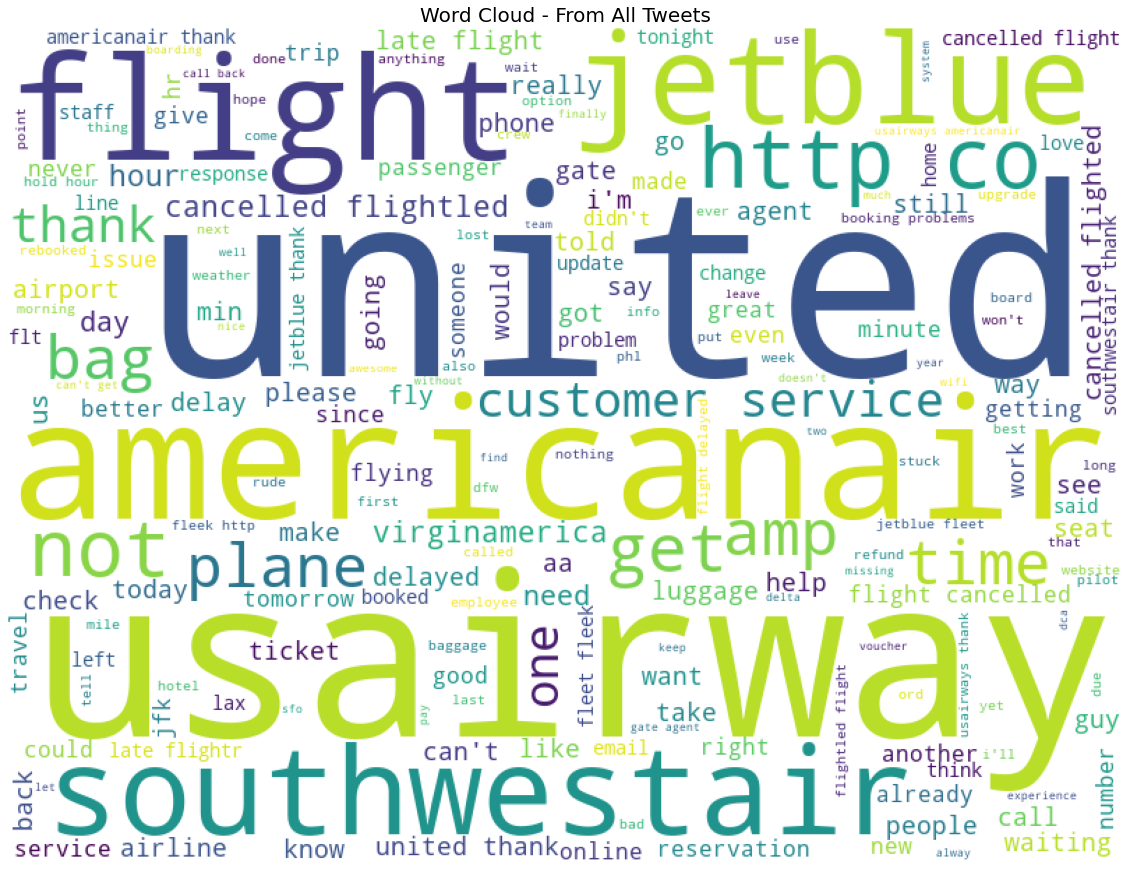

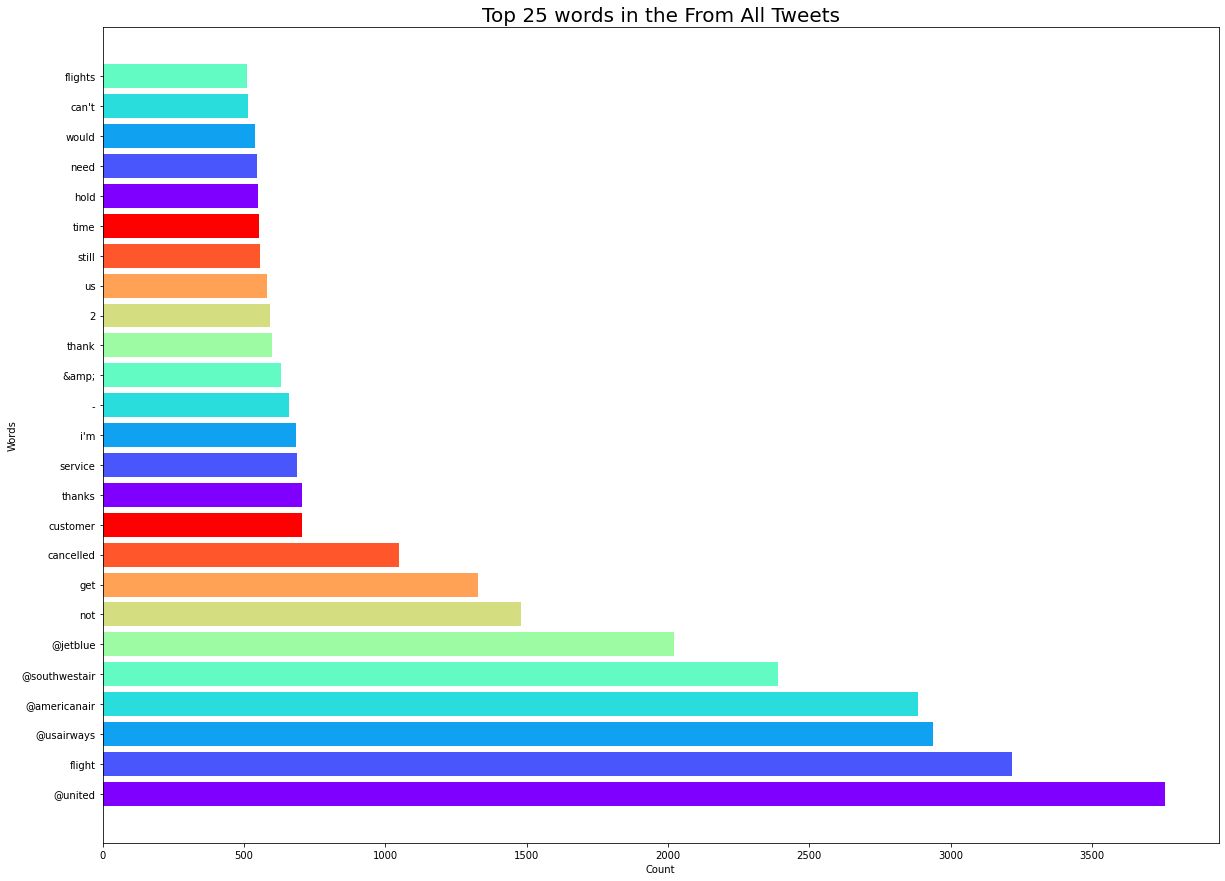

time: 5.34 s (started: 2022-03-02 19:18:43 +00:00)


In [ ]:
show_wordcloud(sentences_as_one_string, 'From All Tweets')

**Observation - Wordcloud - From All tweets**

Total words - 14640

Top words we see in word cloud are airline names, flight, not, get, cancelled, service, thanks.

**Wordcloud - Negative Tweets**

sentences len :  9178


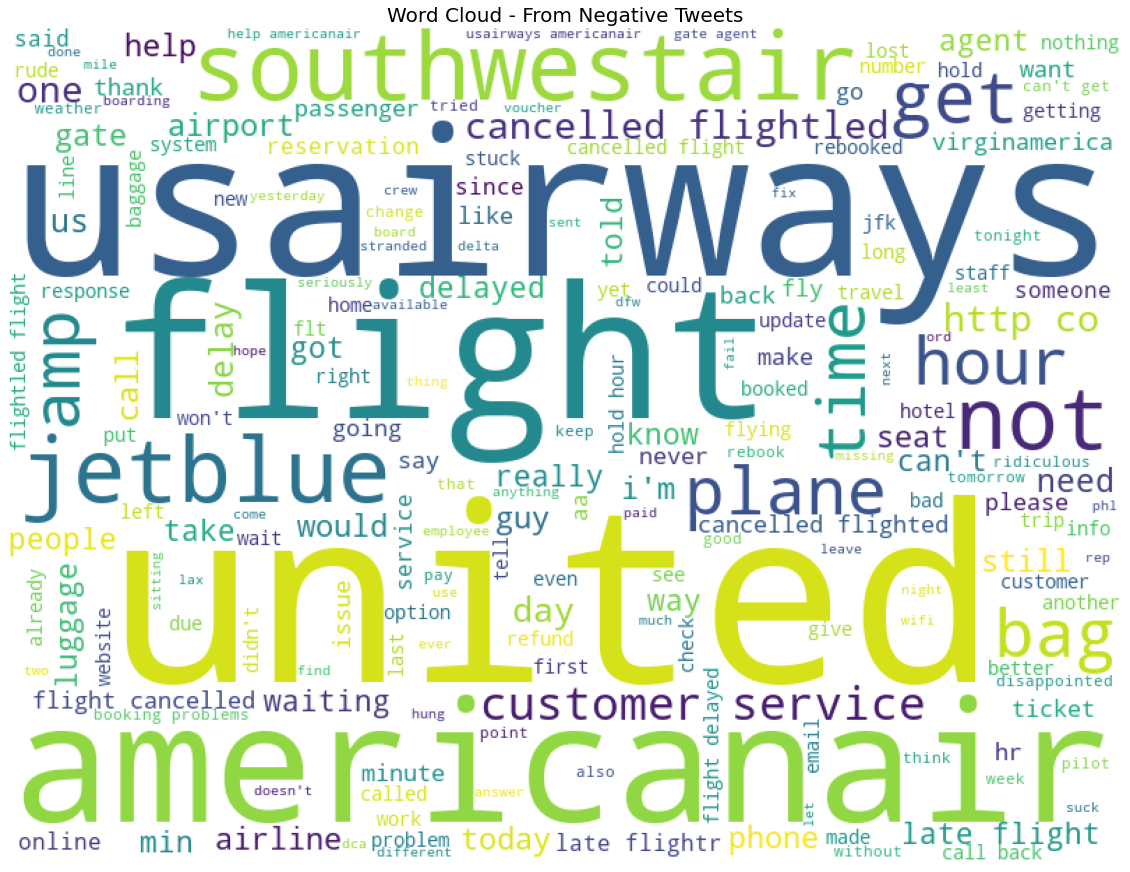

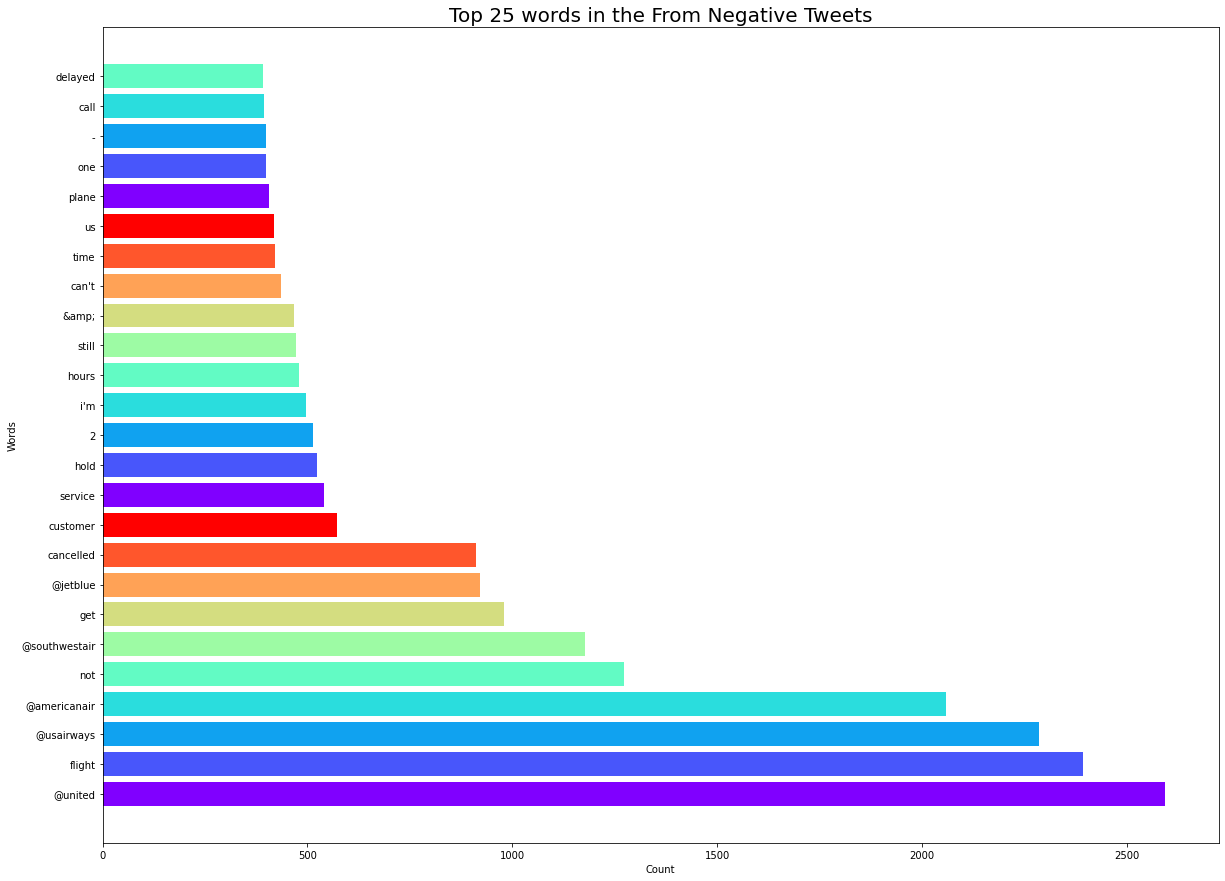

time: 4.3 s (started: 2022-03-02 19:18:48 +00:00)


In [ ]:

# Collect all tweet texts and combine them as one sentence

sentences = data[data["airline_sentiment"]=="negative"]['text'].tolist()
print('sentences len : ', len(sentences))

sentences_as_one_string =" ".join(sentences)

show_wordcloud(sentences_as_one_string, 'From Negative Tweets')

**Observation - Wordcloud - From negative tweets**

Total negative tweet words - 9178

Top words we see in word cloud are airline names, flight, not, get, cancelled, service, hold.




**Wordcloud - Positive Tweets**

sentences len :  2363


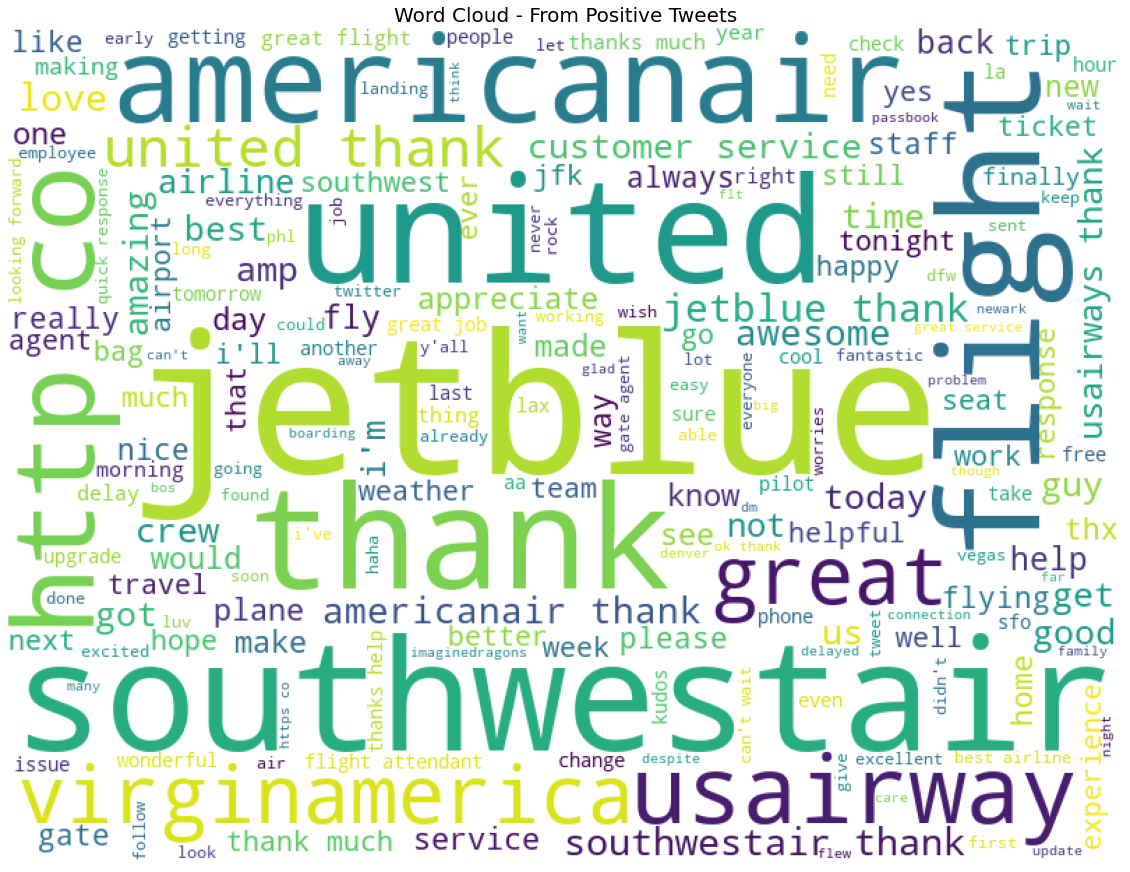

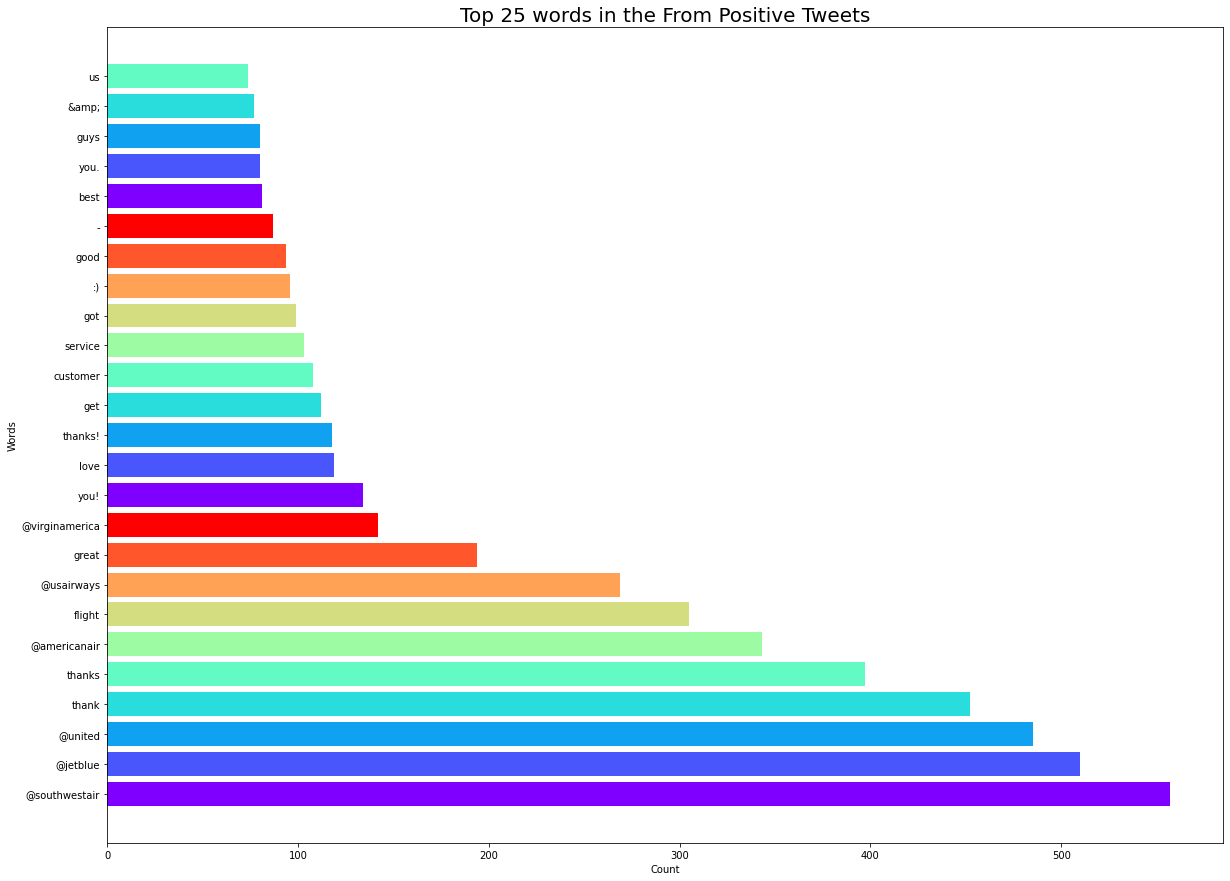

time: 2.7 s (started: 2022-03-02 19:18:52 +00:00)


In [ ]:

# Collect all tweet texts and combine them as one sentence

sentences = data[data["airline_sentiment"]=="positive"]['text'].tolist()
print('sentences len : ', len(sentences))

sentences_as_one_string =" ".join(sentences)

show_wordcloud(sentences_as_one_string, 'From Positive Tweets')

**Observation - Wordcloud - From positive tweets**

Total positive tweet words - 2363

Top words we see in word cloud are airline names, flight, thanks, thank, great, love




**Wordcloud - Neutral Tweets**

sentences len :  3099


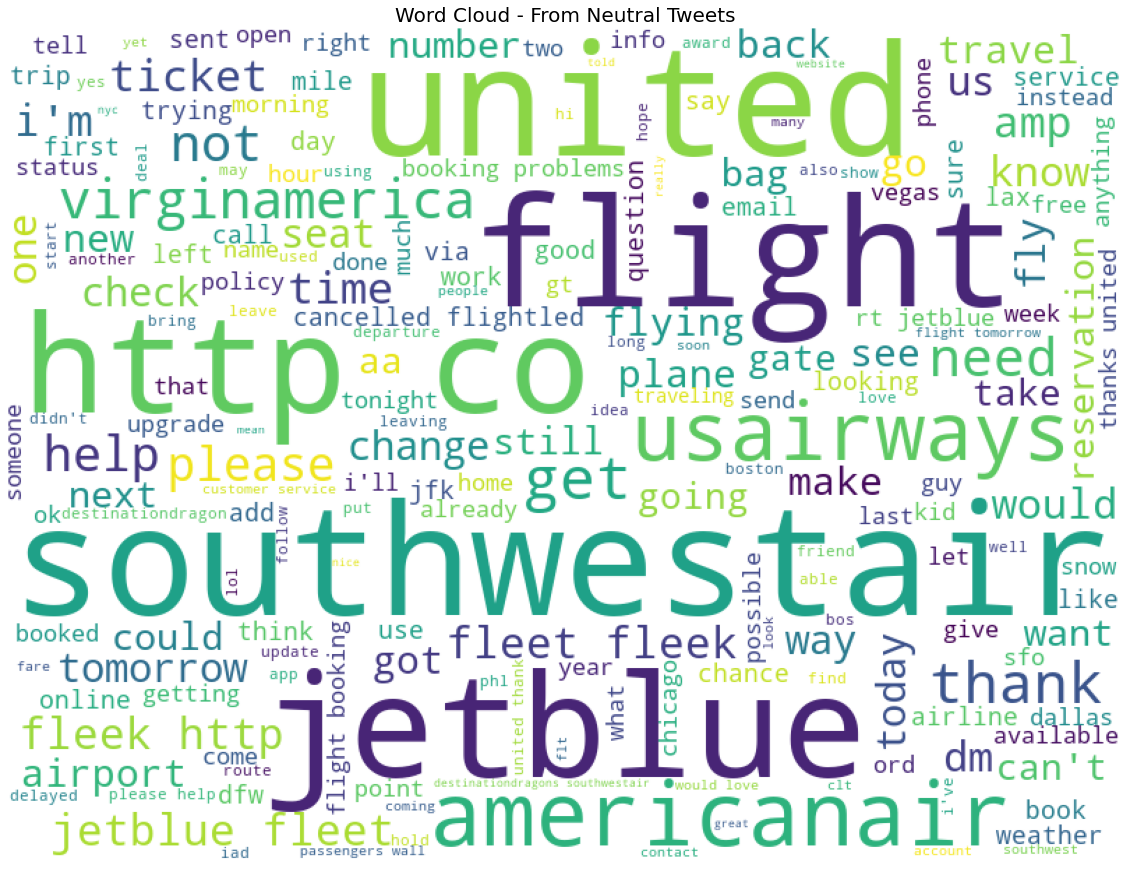

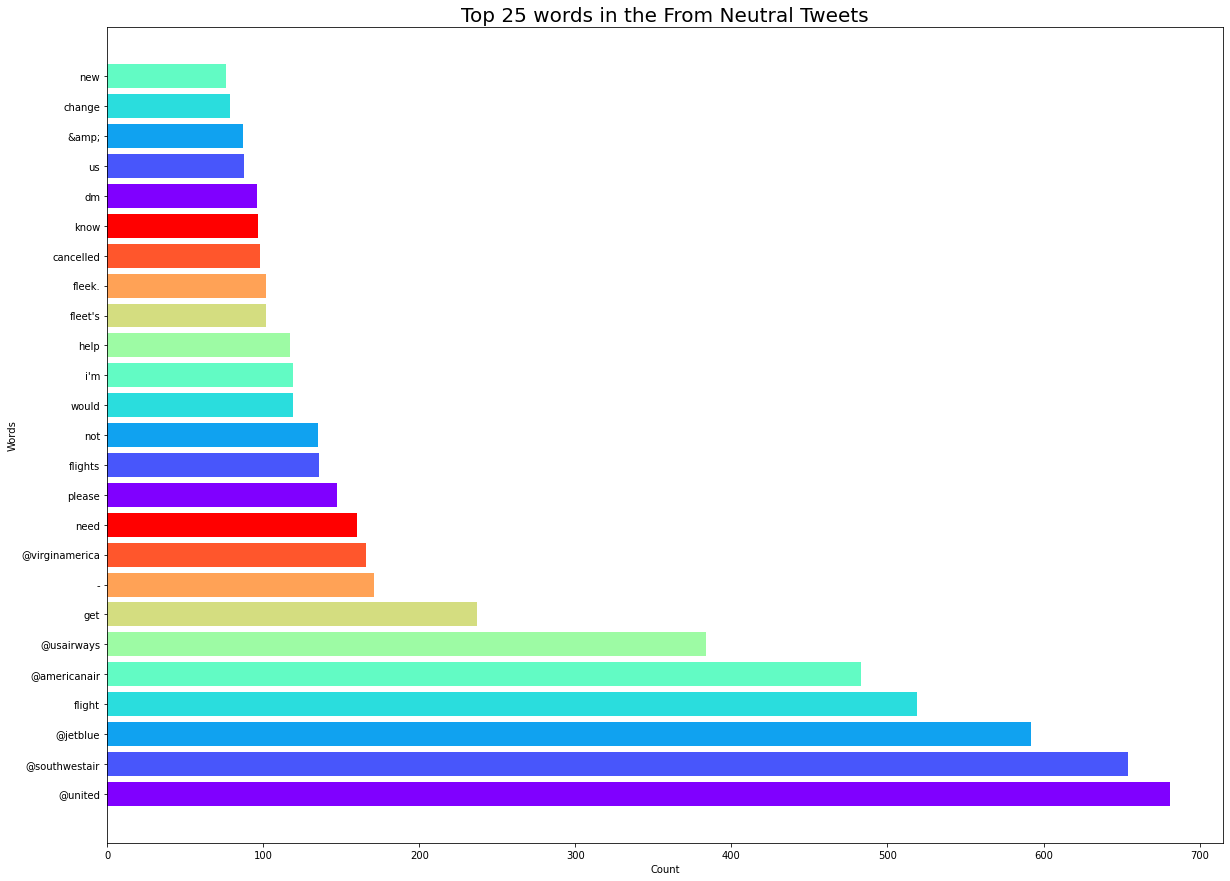

time: 3.04 s (started: 2022-03-02 19:18:55 +00:00)


In [ ]:
# Collect all tweet texts and combine them as one sentence

sentences = data[data["airline_sentiment"]=="neutral"]['text'].tolist()
print('sentences len : ', len(sentences))

sentences_as_one_string =" ".join(sentences)

show_wordcloud(sentences_as_one_string, 'From Neutral Tweets')

**Observation - Wordcloud - From neutral tweets**

Total neutral tweet words - 3099

Top words we see in word cloud are airline names, flight, get, need, please not, help 


### Data correlation analysis - Heatmap

lets check how each numerical features are related

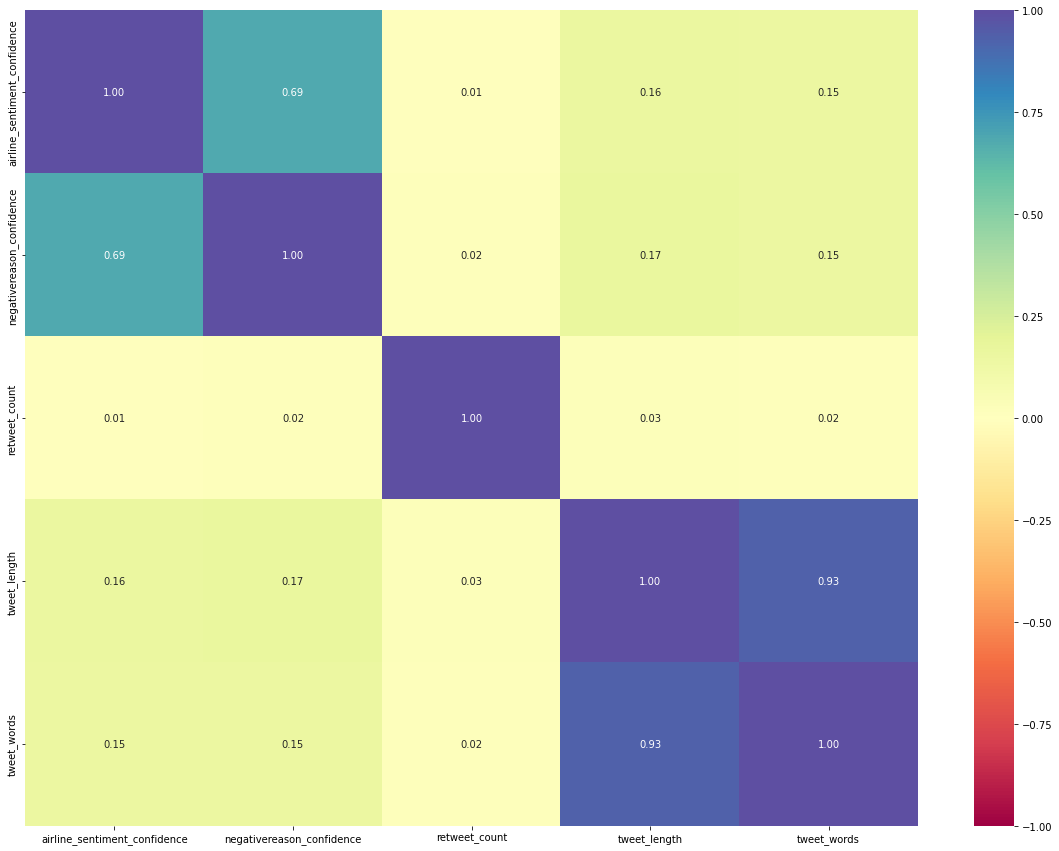

time: 449 ms (started: 2022-03-02 19:18:58 +00:00)


In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

** Key Observations on Data correlation **

* Airline confidence and negative reason confidence has 70% corelation
* Tweet Length & Tweet words are highly corelated, Expect more words means more length 

* both features has corelation we not going to use for sentiment analysis so we can leave them as it is 

### Pair Plot analysis

<Figure size 1440x1440 with 0 Axes>

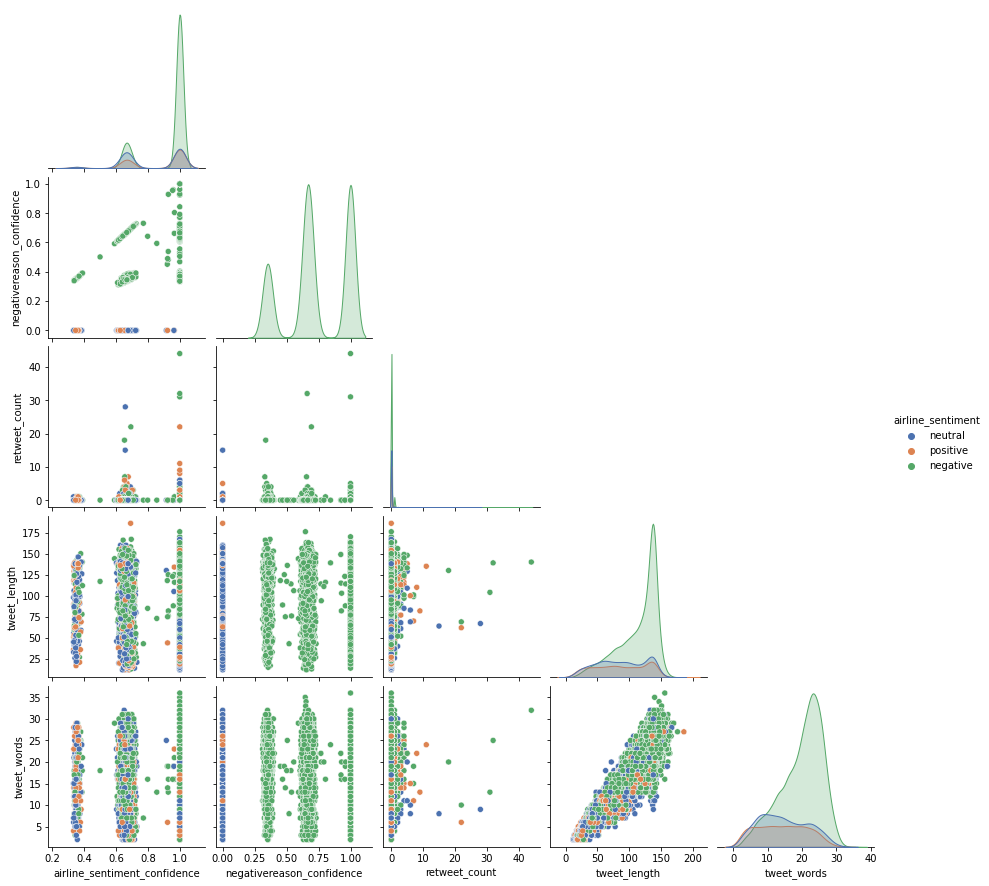

time: 16.5 s (started: 2022-03-02 19:18:59 +00:00)


In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, corner=True, palette="deep", hue="airline_sentiment")
plt.show()



**Key Observations on Pair Plot**


* Airline confidence and negative reason confidence shows relation only for negtive tweets

* Tweet Length & Tweet words are highly corelated, Expect more words means more length 

* both features has corelation we not going to use for sentiment analysis so we can leave them as it is 


## **Insights based on EDA**


* `airline_sentiment` - target feature has 3 possible values, `Required for sentiment analysis`
* `negativereason` -  has 10 possible values
* `airline` - has 6 possible values 
* `airline_sentiment_gold` -  has lot of missing values, Otherwise 3 possible values
* `name` - tweet account name has 7701 unique values, This column can be dropped, This feature does not provide any value in sentiment analysis

* `negativereason_gold` - has total 13 unique values
* `text` - tweet text has total 14427 unique values, `Required for sentiment analysis`
* `tweet_coord` - location cordinates has lot of missing values and since its location this feature does not provide any value in sentiment analysis
* `tweet_created` -  has total 14247 unique valuesa nd since its data time feature this feature does not provide any value in sentiment analysis
* `tweet_location` - has total 3081 unique values
* `user_timezone` - has total 85 unique values


**Observation on missing data**

* `negativereason_gold` - has 99.78% missing data
* `airline_sentiment_gold` - has 99.72% missing data
* `tweet_coord` - has 93.03% missing data
* `negativereason` - has 37.30% missing data
* `user_timezone` - has 32.92% missing data
* `tweet_location` - has 32.32% missing data
* `negativereason_confidence` - has 38.12% missing data


**Most values missing are for negative reasons and wont exists for postive and neutral sentiments**

**None of these fields with missing values will impact our sentiment analysis so no fix required to fill missing values.**



**Removed features before EDA**

*   tweet_id - Unique Tweet ID, Not add any value 
*   airline_sentiment_gold - 99%+ missing values
*   name - customer tweet account name, Not add any value 
*   negativereason_gold - 99%+ missing values
*   tweet_coord - Location Coordinates
*   tweet_created - Tweet Create Date Time
*   tweet_location - Tweet Location
*   user_timezone - Customer Timezone 


After removing feature not required for initial analysis we have 7 features 

* only negativereason & negativereason_confidence has some missing values. Only 2 feature has some missing values because those are negative sentiment related features. Postive and Neutral sentiment will not have any values.
* airline_sentiment_confidence & negativereason_confidence ranges from 0 to 1 
* 75% tweets does not have retweet, Max retweet count is 44 


**Observations on airline_sentiment**

* negative has 9178 values, Negative sentiment has high share 65%+ and dominant in this given data set 
* neutral has 3099 values
* positive has 2363 values

**Observations on airline_sentiment_confidence**

* from graphs we can clearly see 75% tweets has airline_sentiment_confidence score 1
* Mean and Median falls within range of 0.9 to 1 for all tweets
* Postive mean and median score are almost 1
* Neutral Mean and Median falls within range of 0.9 to 1
* Only negative has outliers ranges beyond IQR Ranges 

**Observations on Negative reason**

* 10 possible negative resons 
* Customer service issue is the top neagative reason
* Late Flights, Bad Flight & Lost Luggages are realted to flight services 

**Observations on Negative reason by Airlines**

* United has most negative reasons across all types, Followed by US Airways 
* Delta, Southwest and Virgin America has least negative reasons 
* Lost luggage, Flight attendent Complaints, Customer service issues are top negative issues reported for both United and US Airways

**Observations on negativereason_confidence**

* Negative confidence not exists for positive and neutra - expected.
* mean & median for negative confidence is around 0.7 and overvall falls between 0.65 to 1


**Observations on retweet_count**

* only very few tweets has retweet counts 
* most retweet happens for negative sentiment 
* top retweets are negative cant tell reason type 
* some postive retweet happens for flight experiece and food served 

**Observations on text**

Critical feature for sentiment analysis 

1.   Negative tweets has more words and tweet length compared to postive and neutral
2.   On Avg Every tweet has 20 words and above for negative tweets
3.   Postive and Neutral has avg 10 to 15 words 
4.   Only Negtive tweets has outliers in word count, Some negative tweet has only 2 words 

**Observation - Wordcloud - From All tweets**

Total words - 14640

Top words we see in word cloud are airline names, flight, not, get, cancelled, service, thanks.

**Observation - Wordcloud - From negative tweets**

Total negative tweet words - 9178

Top words we see in word cloud are airline names, flight, not, get, cancelled, service, hold.


**Observation - Wordcloud - From positive tweets**

Total positive tweet words - 2363

Top words we see in word cloud are airline names, flight, thanks, thank, great, love


**Observation - Wordcloud - From neutral tweets**

Total neutral tweet words - 3099

Top words we see in word cloud are airline names, flight, get, need, please not, help 

**Key Observations on Pair Plot**


* Airline confidence and negative reason confidence shows relation only for negtive tweets

* Tweet Length & Tweet words are highly corelated, Expect more words means more length 

* both features has corelation we not going to use for sentiment analysis so we can leave them as it is 

# **Data Cleaning - Text Pre-processing**

Clean Tweet text before processing & preating Train & Test data for NLP Models 

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am)
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data


**Remove html tags from data**

**`Beautiful Soup`** is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

In [ ]:
def strip_html(text):
    """Remove all html tags from given input"""
    soup = BeautifulSoup(text, "html.parser")    
    for data in soup(['style', 'script']):
       # Remove tags
      data.decompose()
  
      # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)                
    #return soup.get_text()

time: 3.37 ms (started: 2022-03-02 19:19:15 +00:00)


**Replace all contractions from data**

A Python library for expanding and creating common English contractions in text. This is very useful for dimensionality reduction by normalizing the text before generating word or character vectors. It performs contraction by simple replacement rules of the commonly used English contractions.

I'd -> I would

I'd -> I had

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

time: 1.44 ms (started: 2022-03-02 19:19:15 +00:00)


**Remove numbers from data**

Remove numbers to text data

In [ ]:
def remove_numbers(text):
  """Remove all numbers from given input"""
  text = re.sub(r'\d+', '', text)
  return text

time: 2.14 ms (started: 2022-03-02 19:19:15 +00:00)


**Remove all @ mentions from data**

Remove All tweet account names, this is not critical for sentiment analysis and from world clound we see account names are top words in all sentiments

In [ ]:
def remove_account_mentions(words):
    """Remove all account mentions from list of tokenized words"""
    new_words = []
    for word in words:
        if "@" not in word:
          new_words.append(word)
    return new_words


time: 2.13 ms (started: 2022-03-02 19:19:15 +00:00)


**Remove all non ascii from data**

Remove non-ASCII characters from list of tokenized words

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


time: 2.55 ms (started: 2022-03-02 19:19:15 +00:00)


**Convert data to lowercase**

Convert all characters to lowercase from list of tokenized words

In [ ]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

time: 2.64 ms (started: 2022-03-02 19:19:15 +00:00)


**Remove punctuation from list of tokenized words**

Remove punctuation from list of tokenized words

In [ ]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

time: 2.98 ms (started: 2022-03-02 19:19:15 +00:00)


**Remove stop words from list of tokenized words**

Remove stop words from list of tokenized words



In [ ]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in final_custom_stopwords:
            new_words.append(word)
    return new_words

time: 2.74 ms (started: 2022-03-02 19:19:15 +00:00)



**Lemmatization with NLTK**

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    """Lemmatization with NLTK"""
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words



lemmatizer = WordNetLemmatizer()

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):

    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
time: 27.3 ms (started: 2022-03-02 19:19:15 +00:00)


## **Data Prepration**

Prepare data before building model. Use text feature and apply all pre text processing methods one by one and clean data

### **Drop Columns**

Drop columns not required for sentiment analysis 

Keeping only text & airline_sentiment

In [ ]:
# pick only required features
data_for_model = data[["text","airline_sentiment","tweet_length","tweet_words"]]

time: 2.9 ms (started: 2022-03-02 19:19:15 +00:00)


**Understand the shape of the dataset.**

In [ ]:
# Check shape of data_for_model
print(f"Given data has total {data_for_model.shape[0]} rows and {data_for_model.shape[1]} columns")

Given data has total 14640 rows and 4 columns
time: 1.32 ms (started: 2022-03-02 19:19:15 +00:00)


#### **Before data text pre processing**
**View the first and last 5 rows of the dataset.**

In [ ]:
# Check head and tail
data_for_model.head(5)

text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  airline_sentiment  tweet_length  tweet_words  
0           neutral            35            4  
1          positive            72            9  
2           neutral            71           12  
3          negative           126           17  
4          negative            55           10

time: 11 ms (started: 2022-03-02 19:19:15 +00:00)


In [ ]:
# Check head and tail
data_for_model.tail(5)

text  \
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  tweet_length  tweet_words  
14635          positive            63           11  
14636          negative           150           23  
14637           neutral            60            7  
14638          negative           135           23  
14639           neutral           138           30

time: 7.63 ms (started: 2022-03-02 19:19:15 +00:00)


### Data Cleaning Pipeline

Chain all methods one by one and clean tweet data 

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs text pre processing 

def normalize_tweets(tweet_text=''):
    output_text = strip_html(tweet_text)
    output_text = replace_contractions(output_text)
    output_text = remove_numbers(output_text)
   

    output_words = output_text.split(" ")
    output_words = to_lowercase(output_words)
    output_words = remove_account_mentions(output_words)
    output_words = remove_non_ascii(output_words)
    output_words = remove_punctuation(output_words)
    output_words = remove_stopwords(output_words)
    #output_words = lemmatize_list(output_words)
    output_sentense = ' '.join(output_words)
    output_sentense = lemmatize_sentence(output_sentense)
    return output_sentense


time: 7.59 ms (started: 2022-03-02 19:19:15 +00:00)


### Clean Tweet text data

Create new feature cleaned_tweet from existing tweet text feature and apply text pre processing. 

In [ ]:
# Clean Tweet Data
data_for_model['cleaned_tweet'] = data_for_model.apply(lambda row: normalize_tweets(row['text']), axis=1)
# Let's get the length of the messages
data_for_model['cleaned_tweet_length'] = data_for_model['cleaned_tweet'].apply(len)
data_for_model['cleaned_tweet_words'] = data_for_model['cleaned_tweet'].apply(word_count)


time: 21.3 s (started: 2022-03-02 19:19:15 +00:00)



Create new feature airline_sentiment_label from existing airline_sentiment feature, Uses Numerical encoding for sentiment lablels 

In [ ]:

# Convert the label (airline_sentiment) to numeric using the pd factorize function 
# Dict with the key-value pair to remap.
data_for_model['airline_sentiment_label'] = data_for_model["airline_sentiment"].replace({"negative": 0, "neutral": 1, "positive": 2})


time: 11.9 ms (started: 2022-03-02 19:19:37 +00:00)


#### **After data text pre processing**
**Check Data before and after cleaning**

In [ ]:
# Check few data after text cleaning & normalization
data_for_model.head(20)

text  \
0                                                                                                            @VirginAmerica What @dhepburn said.   
1                                                                       @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                        @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                        @VirginAmerica and it's a really big bad thing about it   
5       @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
6                                                                @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)   
7                                   @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP   
8                                                                                                @virginamerica Well, I didn't…but NOW I DO! :-D   
9                                                               @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.   
10                                               @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24   
11                                                           @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D   
12   @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p   
13  @VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn   
14                                                                                                                        @VirginAmerica Thanks!   
15                                                                                                 @VirginAmerica SFO-PDX schedule is still MIA.   
16  @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo   
17     @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
18                                                                                                               I ❤️ flying @VirginAmerica. ☺️👍   
19                                   @VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.   

   airline_sentiment  tweet_length  tweet_words  \
0            neutral            35            4   
1           positive            72            9   
2            neutral            71           12   
3           negative           126           17   
4           negative            55           10   
5           negative           135           22   
6           positive            79           15   
7            neutral           108           13   
8           positive            47            8   
9           positive            80           14   
10           neutral            95           16   
11          positive            83           12   
12          positive           139           26   
13          positive           140           18   
14          positive            22            2   
15          negative            45            6   
16          positive           140           22   
17          negative           137           28   
18          positive            31            5   
19         

time: 13.3 ms (started: 2022-03-02 19:19:37 +00:00)


**Observation on data cleaning**

We can see text preprocessing applied and cleaned_tweet has only core text required for sentiment analysis

### **Data Preparation for Modeling**

***CountVectorizer*** is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.


***TF-IDF (term frequency-inverse document frequency)*** is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

* One Hot Encoding - Creating Dummy Variables for category type feature - airline_sentiment

* Separating Dependent airline_sentiment feature and Text feature cleaned_tweet

* Create Train & Test data with CountVectorizer & Term Frequency(TF) - Inverse Document Frequency(IDF)

In [ ]:

# Separating airline_sentiment feature and cleaned_tweet feature

# Adding cleaned_tweet feature

X = data_for_model["cleaned_tweet"]

# Adding airline_sentiment feature

Y = data_for_model["airline_sentiment_label"]

# Checking Shape of X & Y and Count of Exit Yes and No

print(f"Before One hot encoding - Shape of X: {X.shape}, And Y: {Y.shape}")
print()

#Y = pd.get_dummies(Y, drop_first=False, prefix='sentiment')

print(f"After One hot encoding - Shape of X: {X.shape}, And Y: {Y.shape}")
print()
display(Y.value_counts())


Before One hot encoding - Shape of X: (14640,), And Y: (14640,)

After One hot encoding - Shape of X: (14640,), And Y: (14640,)



0    9178
1    3099
2    2363
Name: airline_sentiment_label, dtype: int64

time: 9.88 ms (started: 2022-03-02 19:19:37 +00:00)


**Sentiment Keys after one hot encoding** 


*   0 - Negative
*   1 - Neutral
*   2 - Positive


In [ ]:
# Max words to consider in vocabulary 
max_features_words = 3000

time: 1.06 ms (started: 2022-03-02 19:19:37 +00:00)


## **Splitting data into training and test**

Split data for training & validation. We use validation data to evaluate model performance

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42, stratify=Y
)


# Checking Shape of X_train & X_test

print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print()

# Checking sentiments share in X_train & X_test

print(f"y_train sentiment counts")
print()
display(y_train.value_counts())
print()
print(f"y_test sentiment counts")
print()
display(y_test.value_counts())
print()
print("first 10 values in y_test")
print(y_test[0:10])

Shape of X_train: (13176,), X_test: (1464,), y_train: (13176,), y_test: (1464,)

y_train sentiment counts



0    8260
1    2789
2    2127
Name: airline_sentiment_label, dtype: int64


y_test sentiment counts



0    918
1    310
2    236
Name: airline_sentiment_label, dtype: int64


first 10 values in y_test
11635    0
4526     0
7991     0
12650    0
7362     0
2973     0
5151     1
10058    0
9373     0
7889     1
Name: airline_sentiment_label, dtype: int64
time: 32.6 ms (started: 2022-03-02 19:19:37 +00:00)


### **Bag of Words (CountVectorizer)**

***CountVectorizer*** is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

Prepare training and test data

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=max_features_words,dtype = np.uint8) # Keep only configured(max_features_words) features as number of features will increase the processing time.

# Fit & Transform using Training data
train_tweets_count_features = count_vectorizer.fit_transform(X_train)

# Just Transform for Test data
test_tweets_count_features = count_vectorizer.transform(X_test)

# Train Data
X_train_count_features = train_tweets_count_features.toarray() # Convert the data features to array for training data
# Test Data
X_test_count_features = test_tweets_count_features.toarray() # Convert the data features to array for test data

X_train_count_feature_names = count_vectorizer.get_feature_names()

time: 273 ms (started: 2022-03-02 19:19:37 +00:00)


In [ ]:
print(f"Count Vectorizer training shape : {X_train_count_features.shape}, testing shape : {X_test_count_features.shape}")
print()
print("Total data features : ", len(X_train_count_feature_names))
print()
print("check one row in train data")
display(X_train_count_features[2])

Count Vectorizer training shape : (13176, 3000), testing shape : (1464, 3000)

Total data features :  3000

check one row in train data


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

time: 6.92 ms (started: 2022-03-02 19:19:37 +00:00)


### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

***TF-IDF (term frequency-inverse document frequency)*** is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

Prepare training and test data

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

idf_vectorizer = TfidfVectorizer(max_features=max_features_words) # Keep only configured(max_features_words) features as number of features will increase the processing time.

# Fit & Transform using Training data
train_tweets_idf_features = idf_vectorizer.fit_transform(X_train)

# Just Transform for Test data
test_tweets_idf_features = idf_vectorizer.transform(X_test)

# Train Data
X_train_idf_features = train_tweets_idf_features.toarray() # Convert the data features to array for training data
# Test Data
X_test_idf_features = test_tweets_idf_features.toarray() # Convert the data features to array for test data

X_train_idf_feature_names = idf_vectorizer.get_feature_names()

time: 440 ms (started: 2022-03-02 19:19:37 +00:00)


In [ ]:
print(f"Tfidf Vectorizer training shape : {X_train_idf_features.shape}, testing shape : {X_test_idf_features.shape}")
print()
print("Total data features : ", len(X_train_idf_feature_names))
print()
print("check one row in train data")
display(X_train_idf_features[2])

Tfidf Vectorizer training shape : (13176, 3000), testing shape : (1464, 3000)

Total data features :  3000

check one row in train data


array([0., 0., 0., ..., 0., 0., 0.])

time: 6.52 ms (started: 2022-03-02 19:19:37 +00:00)


# **Building Natural Language Processing Models**

lets build differnt NLP models using Count Vectorizer data and Tfidf Vectorizer data 


* Unsupervised Learning 

  * VADER Sentiment Analysis

* Supervised Learning 

  * RandomForest Classifier
  * Naive Bayes Classifier
  * Tensorflow Keras - Deep Learning Classifier

Compare all model performance & fine tune for more improvements 


**Methods to Plot performance scores & Plot Confusion Matrix**

Common method to plot model scores & confusion matrix for all models 

In [ ]:

from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score,confusion_matrix

# Method to plot Model Accuracy, Recall, Precision and F1_score scores 
def plot_model_scores(model_name=None, original_data=None, predicted_data=None):

  predicted_accuracy_score = np.round(accuracy_score(original_data, predicted_data) * 100, 3)
  predicted_recall_score = np.round(recall_score(original_data, predicted_data, average='weighted') * 100, 3)
  predicted_precision_score = np.round(precision_score(original_data, predicted_data, average='weighted') * 100, 3)
  predicted_f1_score = np.round(f1_score(original_data, predicted_data, average='weighted') * 100, 3)
  
  train_df = pd.DataFrame(data=[[model_name,original_data.shape[0],predicted_accuracy_score,predicted_recall_score,predicted_precision_score,predicted_f1_score]],
                            columns=["Model Name", "# Records","Accuracy","Recall","Precision","F1_score"])

  print(f"Performance scores for model : {model_name}")
  print()
  display(train_df)
  print()
  plot_model_confusion_matrix(model_name=model_name, original_data = original_data,predicted_data = predicted_data)
  return train_df

#Plot Confusion Matrix
def plot_model_confusion_matrix(model_name=None,original_data=None, predicted_data=None):
    # Test Prediction 
    test_score = accuracy_score(np.array(original_data), np.array(predicted_data))
    cf_matrix = confusion_matrix(np.array(original_data), np.array(predicted_data))

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(3,3)
    sentiment_types = ["negative","neutral","positive"]
    plt.figure(figsize=(10,8))
    res = sns.heatmap(cf_matrix, xticklabels=sentiment_types, yticklabels=sentiment_types, annot=labels, cmap='Blues',  fmt='',annot_kws={"fontsize":18})
    #res = sns.heatmap(cf_matrix, annot=labels, cmap='Blues',  fmt='',annot_kws={"fontsize":18})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
    plt.title(f"Model {model_name}, Accuracy : {np.round((test_score * 100),decimals=2)}%", fontsize = 20)
    plt.show()


time: 41.5 ms (started: 2022-03-02 19:19:37 +00:00)


## **Unsupervised Learning methods for Sentiment Analysis**
### Model 1 - Vader Sentiment Analysis
**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us **how** positive or negative a sentiment is.




In [ ]:
!pip install vaderSentiment    # Install vader sentiment package

time: 3.18 s (started: 2022-03-02 19:19:38 +00:00)


In [ ]:

# import SentimentIntensityAnalyzer from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader_sentiment_scores(text_val):
    # Create a SentimentIntensityAnalyzer object.
    sentiment_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sentiment_obj.polarity_scores(text_val)
    
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "negative"
    else :
        return "neutral" 
 

time: 5.71 ms (started: 2022-03-02 19:19:41 +00:00)


**Vader sentiment on Original tweet text**

Using orignal text and predict sentiment 

In [ ]:

# Vader sentiment on original tweet 
model_name="Vader - original text"
data_for_vader_analysis = data_for_model[['text','airline_sentiment']]
data_for_vader_analysis['predicted_sentiment'] = data_for_vader_analysis['text'].apply(lambda review: vader_sentiment_scores(review))
data_for_vader_analysis.sample(10)

text  \
9445                    @USAirways is the absolute worst airline. 13 women were inconvenienced due to maintenance issues. Stuck all over- no care given.   
2040                @united oh, I'll be sharing alright. Especially about sleeping in this shitty airport and getting 1hr of sleep all night because UA.   
1913           @united. If you show available seats, you need to honor that! I shouldnt spend 1hr on phone to hear that "really there are 3 not 4 seats"   
12466          @AmericanAir what's the point? So I can wait for another 6 weeks. U r one of the only airlines that refuses to handle complaints by phone   
3840         @united 65 and 72 year old flying to Tokyo for vacation both with bad knees and this happens https://t.co/72RMpkOGwu @cbcallinaday @CBCNews   
7492                              @JetBlue also not have food available even for purchase is quite shocking since this is a 5 hour international flight.   
14087                                                                                                         @AmericanAir Great seats on this aircraft!   
13764                            @AmericanAir @ArminRosen @ggreenwald Tell that piece of shit to get fucked... I'll fly exclusively with you for life...   
2741   @United What idiot designed your seats? Armrest TV remote &amp; resting elbows don't mix. Seatmate keeps changing channels &amp; blasting volume.   
171                                                                                               @VirginAmerica Lister to my show my on Monday 1230 130   

      airline_sentiment predicted_sentiment  
9445           negative            negative  
2040           negative            positive  
1913           negative            positive  
12466          negative            negative  
3840           negative            negative  
7492           negative            negative  
14087          positive            positive  
13764          negative            negative  
2741           negative            negative  
171             neutral             neutral

time: 2min 42s (started: 2022-03-02 19:19:41 +00:00)


Performance scores for model : Vader - original text



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  Vader - original text      14640    48.989  48.989      69.37     51.42

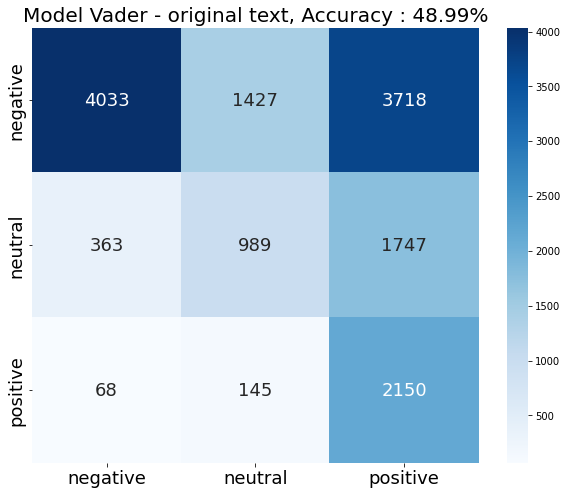

time: 599 ms (started: 2022-03-02 19:22:23 +00:00)


In [ ]:

# Plot Model Scores

original_data = data_for_vader_analysis['airline_sentiment']
predicted_data = data_for_vader_analysis['predicted_sentiment']

m1_scores = plot_model_scores(model_name=model_name, original_data = original_data,predicted_data = predicted_data)

 **Observation on Vader sentiment with original tweet**

 * Very low accuracy scores onlu 49%
 * Model predicted positive sentiments almost correcty but did very poor on negative and neutral
 
 **This model did not perform well. Very low accuracy scores.**

**Vader sentiment on cleaned text tweet**

Using cleaned text and predict sentiment

In [ ]:

# Vader sentiment on cleaned tweet 
model_name="Vader - normalized text"
data_for_vader_analysis = data_for_model[['cleaned_tweet','airline_sentiment']]
data_for_vader_analysis['predicted_sentiment'] = data_for_vader_analysis['cleaned_tweet'].apply(lambda review: vader_sentiment_scores(review))
data_for_vader_analysis.sample(10)

cleaned_tweet  \
2722                                                                                                                                    thank you   
6836   a month ago i have a flight book but then have to cancel flight it i be now flight book problem a separate flight for a different occasion   
12423                                                                                                              thanks flight today great crew   
1819                        delay because of salt on the floor from previous passenger the of just just want to fly do not care about our shoe ua   
9691                                                                    look for some help to recover an item i leave on an airplane this evening   
8095             that would be great i never think i would be the sort who would be into them but it really make the fly experience more bearable   
6951                                                       i hear you be plan on let people fly in the overhead compartment why would you do that   
5823                                                                                                    good to know perhaps it be execution then   
5315                                    thx i manage to figure it out by try diff confirmation s as i book just annoy it be not readily available   
7975                                        why not deal with that while the plane on the ground instead of divert the plane add hr to the flight   

      airline_sentiment predicted_sentiment  
2722           positive            positive  
6836            neutral            negative  
12423          positive            positive  
1819           negative            negative  
9691            neutral            positive  
8095           positive            positive  
6951            neutral             neutral  
5823            neutral            positive  
5315           negative            negative  
7975           negative             neutral

time: 2min 42s (started: 2022-03-02 19:22:24 +00:00)


Performance scores for model : Vader - normalized text



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  Vader - normalized text      14640    54.911  54.911     69.991     57.14

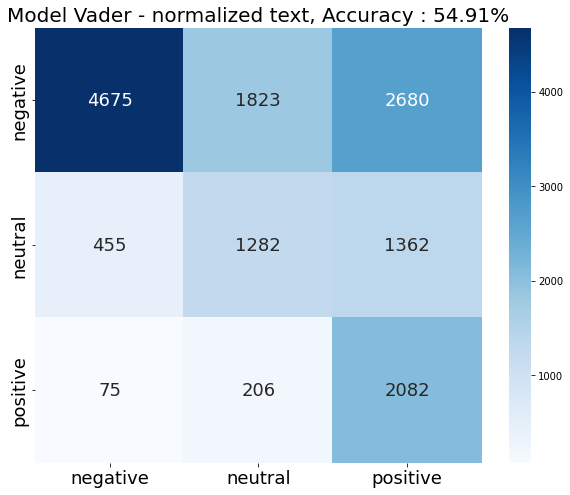

time: 570 ms (started: 2022-03-02 19:25:06 +00:00)


In [ ]:

# Plot Model Scores

original_data = data_for_vader_analysis['airline_sentiment']
predicted_data = data_for_vader_analysis['predicted_sentiment']

m2_scores = plot_model_scores(model_name=model_name, original_data = original_data,predicted_data = predicted_data)

 **Observation on Vader sentiment with cleaned tweet**

 * Very low accuracy scores - 55%,  Better than previous model. But still very low accuracy
 * Model predicted positive sentiments correcty but did very poor on negative and neutral
 

 **This model did not perform well. Very low accuracy scores.**

### Observation on Vader Sentiment Analysis

 **Vader sentiment analysis on both orignal text and cleaned text did not perform well. Very low accuracy scores.**


## **Supervised Learning methods for Sentiment Analysis**

### Model 1 - Naive Bayes Multi Class - Sentiment Analysis - with Count Vectorizer features

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score

# Naive Bayes Multi Class Model
model_name="Naive Bayes Count"
clf = MultinomialNB()
clf.fit(X_train_count_features, y_train)

# Cross validation 
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

print("Cross validation start")
print("Model Scores : ", cross_val_score(clf, X_train_count_features, y_train, cv=k_fold, n_jobs=-1))
print("Cross validation end")




Cross validation start
Model Scores :  [0.75796662 0.77381404 0.76963947 0.78330171 0.78026565]
Cross validation end
time: 4.07 s (started: 2022-03-02 19:25:07 +00:00)


Performance scores for model : Naive Bayes Count-training



Model Name  # Records  Accuracy  Recall  Precision  \
0  Naive Bayes Count-training      13176    82.157  82.157     81.625   

   F1_score  
0    81.732

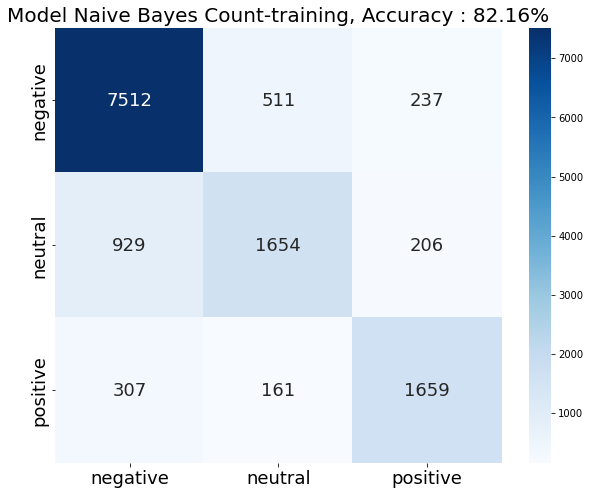

time: 443 ms (started: 2022-03-02 19:25:11 +00:00)


In [ ]:
# Plot Model Scores Training Data

predictions = clf.predict(X_train_count_features)

original_data = y_train
predicted_data = predictions

nb_m1_scores_train = plot_model_scores(model_name=model_name+"-training", original_data = original_data,predicted_data = predicted_data)

Performance scores for model : Naive Bayes Count-validation



Model Name  # Records  Accuracy  Recall  Precision  \
0  Naive Bayes Count-validation       1464    77.596  77.596      76.77   

   F1_score  
0     76.96

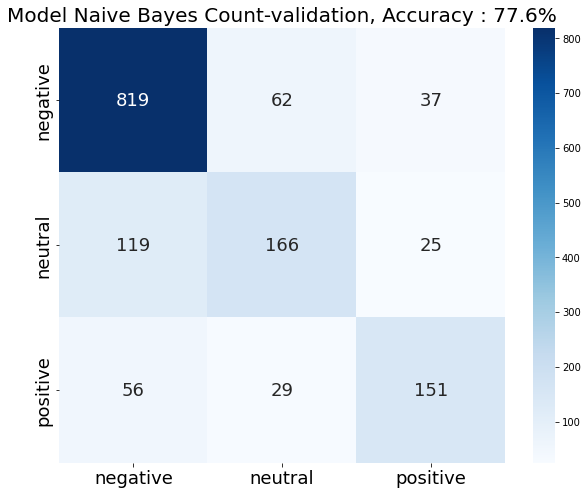

time: 332 ms (started: 2022-03-02 19:25:11 +00:00)


In [ ]:
# Plot Model Scores Test Data
predictions = clf.predict(X_test_count_features)

original_data = y_test
predicted_data = predictions

nb_m1_scores_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)

**Observations on Naive Bayes Multi Class - Sentiment Analysis - with Count Vectorizer features**

* Both Training & Validation are above 75%, Traning overfit by 5%. Not bad 
* Model corectly identifying all 3 sentiment 

### Naive Bayes Multi Class - Sentiment Analysis - with Tfidf Vectorizer features

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score

# Naive Bayes Multi Class Model
model_name="Naive Bayes TFIDF"
clf = MultinomialNB()
clf.fit(X_train_idf_features, y_train)

# Cross validation 
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

print("Cross validation start")
print("Model Scores : ", cross_val_score(clf, X_train_idf_features, y_train, cv=k_fold, n_jobs=-1))
print("Cross validation end")




Cross validation start
Model Scores :  [0.71130501 0.7259962  0.7316888  0.72903226 0.72485769]
Cross validation end
time: 1.3 s (started: 2022-03-02 19:25:12 +00:00)


Performance scores for model : Naive Bayes TFIDF-training



Model Name  # Records  Accuracy  Recall  Precision  \
0  Naive Bayes TFIDF-training      13176    76.283  76.283     79.116   

   F1_score  
0    72.836

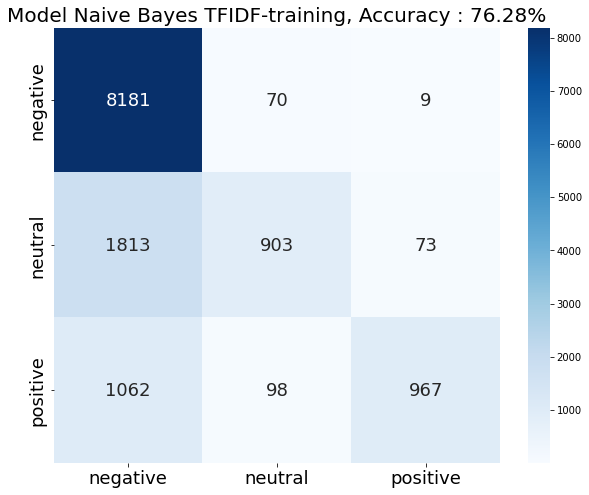

time: 405 ms (started: 2022-03-02 19:25:13 +00:00)


In [ ]:
# Plot Model Scores Training Data

predictions = clf.predict(X_train_idf_features)

original_data = y_train
predicted_data = predictions

nb_m2_scores_train = plot_model_scores(model_name=model_name+"-training", original_data = original_data,predicted_data = predicted_data)

Performance scores for model : Naive Bayes TFIDF-validation



Model Name  # Records  Accuracy  Recall  Precision  \
0  Naive Bayes TFIDF-validation       1464    73.907  73.907     76.154   

   F1_score  
0    69.644

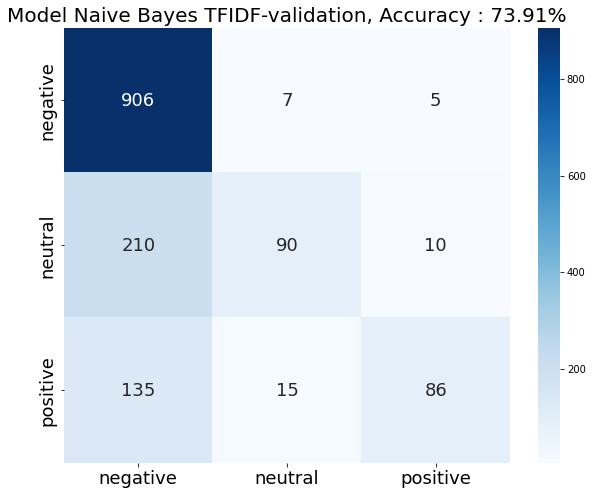

time: 309 ms (started: 2022-03-02 19:25:13 +00:00)


In [ ]:
# Plot Model Scores Test Data

predictions = clf.predict(X_test_idf_features)

original_data = y_test
predicted_data = predictions

nb_m2_scores_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)

**Observations on Naive Bayes Multi Class - Sentiment Analysis - with Tfidf Vectorizer features**

* Both Training & Validation are above 70%, Traning not overfit.
* Scores are low compared to count vectorizer features
* Model corectly identifying all 3 sentiment 



### **Model 2 - Using Random Forest to build model for the classification of reviews.** -  Sentiment Analysis - with Count Vectorizer features



In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
model_name="RF count"
forest_count = RandomForestClassifier(n_estimators=100, n_jobs=-1)

forest_count =  forest_count.fit(X_train_count_features, y_train)

print(forest_count)


RandomForestClassifier(n_jobs=-1)
time: 7.75 s (started: 2022-03-02 19:25:14 +00:00)


Performance scores for model : Keras Optimized-validation



Model Name  # Records  Accuracy  Recall  Precision  \
0  Keras Optimized-validation       1464    78.074  78.074     77.817   

   F1_score  
0    76.327

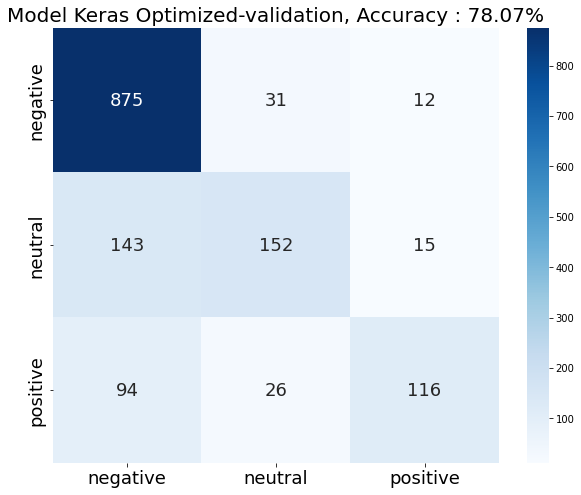

time: 385 ms (started: 2022-03-02 19:34:21 +00:00)


In [ ]:
# Plot Model Scores Test Data

predictions = forest_count.predict(X_test_count_features)

original_data = y_test
predicted_data = predictions

rf_m1_scores_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)

**Observation - Random Forest -  Sentiment Analysis - with Count Vectorizer features**

* Model has accuracy score 78%, Not bad with 100 estimators 



### **Model 2 - Using Random Forest to build model for the classification of reviews.** -  Sentiment Analysis - with TD-IDF Vectorizer features



In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
model_name="RF TF-IDF"
forest_idf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

forest_idf = forest_idf.fit(X_train_idf_features, y_train)

print(forest_idf)


RandomForestClassifier(n_jobs=-1)
time: 8.38 s (started: 2022-03-02 19:34:21 +00:00)


Performance scores for model : RF TF-IDF-validation



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  RF TF-IDF-validation       1464    77.527  77.527     77.645    75.425

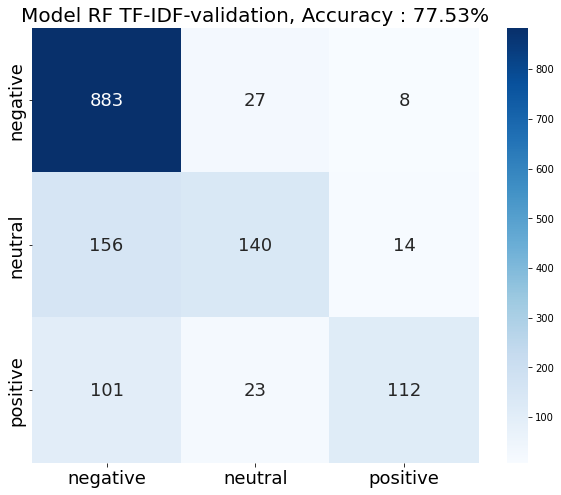

time: 392 ms (started: 2022-03-02 19:34:29 +00:00)


In [ ]:
# Plot Model Scores Test Data

predictions = forest_idf.predict(X_test_idf_features)

original_data = y_test
predicted_data = predictions

rf_m1_scores_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)

**Observation - Random Forest -  Sentiment Analysis - with IF-IDF Vectorizer features**

* Model has accuracy score 78%, Not bad with 100 estimators - same as count Vectorizer features

### **Model 3 - NLP With TensorFlow/Keras**

**Common method to plat model performance, loss and accuracy scores for tensorflow models**

In [ ]:

def plot_model_performance(history=None):
  
    hist  = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    # Loss Metrics
    ax1 = axs[0]
    ax1.set_title('Loss Graph')
    ax1.set_xlabel('epoch(s)')
    ax1.set_ylabel('loss')

    ax1.plot(hist['loss'])
    ax1.plot(hist['val_loss'])
    ax1.legend(("train" , "val") , loc =0)


    # Accuracy Metrics
    ax2 = axs[1]
    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch(s)')
    ax2.set_ylabel('accuracy')

    ax2.plot(hist['accuracy'])
    ax2.plot(hist['val_accuracy'])
    ax2.legend(("train" , "val") , loc =0)



time: 14.5 ms (started: 2022-03-02 19:34:30 +00:00)


**Import all required tensor flow Libraries**

In [ ]:
# Model NLP With TensorFlow/Keras
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, GlobalAveragePooling1D

time: 2.79 ms (started: 2022-03-02 19:59:41 +00:00)


**Creating custom call backs to log accuracy scores, adjust learning rate for every 3 epoch**

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

class CustomCallback(tf.keras.callbacks.Callback):
  def __init__(self, fraction):
    super(CustomCallback, self).__init__()

    self.fraction = fraction

  def on_train_begin(self, logs=None):
    print()
    print(f"Training Started with fraction : {self.fraction}")
    print() 

  def on_train_end(self, logs=None):
    print()
    print(f"Training End")
    print()

  def on_epoch_begin(self, epoch,logs=None):
    if epoch % 3 ==0 and epoch > 2:
      lr = tf.keras.backend.get_value(self.model.optimizer.lr)
      curr_lr = lr
      lr=lr-(lr*self.fraction)
      tf.keras.backend.set_value(self.model.optimizer.lr, lr)
      print()
      print(f"Updating new Learning rate -> At epoch : {epoch}, lr : {curr_lr} change to new lr : {lr} with fraction : {self.fraction}")
      print()

  def on_epoch_end(self, epoch,logs=None):
    val_acc = logs.get('val_accuracy')
    train_acc = logs.get('accuracy')
    if(val_acc >= .85 and train_acc >= .85): # Experiment with changing this value
      print(f"\nReached above target {self.target_accuracy_score} accuracy so cancelling training!")
      self.model.stop_training = True



time: 27.1 ms (started: 2022-03-02 19:59:42 +00:00)


**Encode sentiment lables using to_categorical to use with tensorflow models**

In [ ]:

from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 

y_train_e = to_categorical(np.array(y_train), num_classes=3, dtype='float32')
y_test_e = to_categorical(np.array(y_test), num_classes=3, dtype='float32')

# Checking Shape of X_train & X_test

print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}, y_train_e: {y_train_e.shape}, y_test_e: {y_test_e.shape}")

Shape of y_train: (13176,), y_test: (1464,), y_train_e: (13176, 3), y_test_e: (1464, 3)
time: 4.98 ms (started: 2022-03-02 19:59:42 +00:00)


### **Model 2 - NLP With TensorFlow/Keras - with Count Vectorizer features**



Build input features with Tensorlow Keras Layers TextVectorization

 Count Vectorizer  - `output_mode:count` - "count": Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item.

In [ ]:

# Build TextVectorization for count
count_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_features_words, standardize=None,split='whitespace', output_mode='count')
count_vectorize_layer.get_config()


{'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 3000,
 'name': 'text_vectorization_24',
 'ngrams': None,
 'output_mode': 'count',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': None,
 'trainable': True,
 'vocabulary': None}

time: 10.9 ms (started: 2022-03-02 19:59:42 +00:00)


In [ ]:

# Adapt the Text Vectorization layer to the training dataset
count_vectorize_layer.adapt(X_train)
vectorized_text = count_vectorize_layer(X_train)
print('Training Data Shape : ',vectorized_text.shape)

vectorized_text_validation = count_vectorize_layer(X_test)
print('Training Data Shape : ',vectorized_text_validation.shape)



Training Data Shape :  (13176, 3000)
Training Data Shape :  (1464, 3000)
time: 2.51 s (started: 2022-03-02 19:59:42 +00:00)


**Create Model**

In [ ]:


# Create Model

model_name="Keras Count"
model = Sequential([
      tf.keras.Input(shape=(1,), dtype=tf.string),
      count_vectorize_layer,
      Dense(16, activation="relu"),
      Dense(3, activation="softmax")

])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile Model

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

# Model Summary

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_24 (Text  (None, 3000)             0         
 Vectorization)                                                  
                                                                 
 dense_66 (Dense)            (None, 16)                48016     
                                                                 
 dense_67 (Dense)            (None, 3)                 51        
                                                                 
Total params: 48,067
Trainable params: 48,067
Non-trainable params: 0
_________________________________________________________________
time: 110 ms (started: 2022-03-02 19:59:44 +00:00)


**Train Model**

In [ ]:
custom_callbacks=CustomCallback(fraction=.25)

E=10

# Train Model

history = model.fit(x=X_train, y=y_train_e,validation_data=(X_test,y_test_e), epochs=E,
                    callbacks=[custom_callbacks] ,verbose=1)


Training Started with fraction : 0.25

Epoch 1/10
412/412 [==============================] - 12s 29ms/step - loss: 0.5720 - accuracy: 0.7703 - val_loss: 0.5149 - val_accuracy: 0.8019
Epoch 2/10
412/412 [==============================] - 12s 30ms/step - loss: 0.3872 - accuracy: 0.8479 - val_loss: 0.5194 - val_accuracy: 0.8026
Epoch 3/10
412/412 [==============================] - 12s 29ms/step - loss: 0.2991 - accuracy: 0.8821 - val_loss: 0.6057 - val_accuracy: 0.8026

Updating new Learning rate -> At epoch : 3, lr : 0.009999999776482582 change to new lr : 0.007499999832361937 with fraction : 0.25

Epoch 4/10
412/412 [==============================] - 12s 29ms/step - loss: 0.2098 - accuracy: 0.9211 - val_loss: 0.7305 - val_accuracy: 0.7985
Epoch 5/10
412/412 [==============================] - 12s 29ms/step - loss: 0.1576 - accuracy: 0.9422 - val_loss: 0.8785 - val_accuracy: 0.7951
Epoch 6/10
412/412 [==============================] - 12s 29ms/step - loss: 0.1228 - accuracy: 0.9565 - val

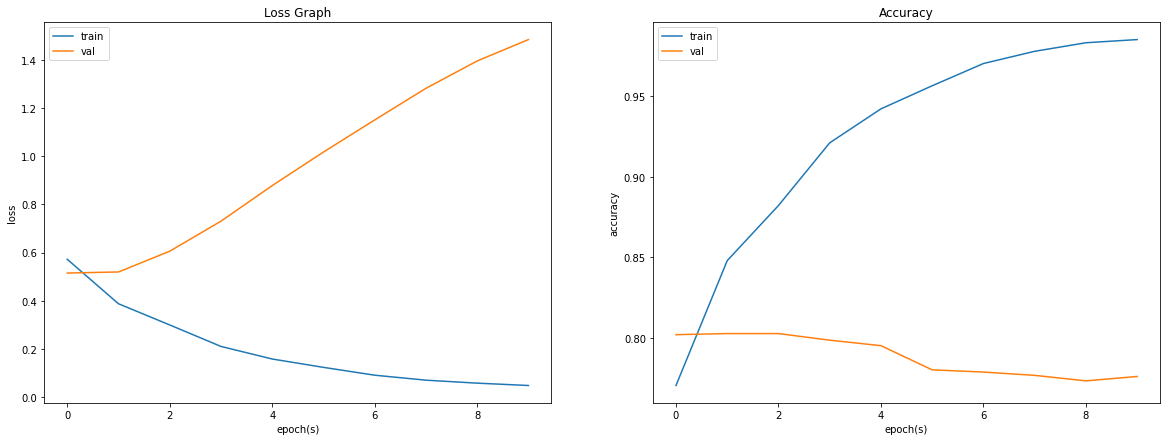

time: 481 ms (started: 2022-03-02 20:02:06 +00:00)


In [ ]:
# Plot Model Performance 
plot_model_performance(history=history)

Performance scores for model : Keras Count-training



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  Keras Count-training      13176    98.983  98.983     98.983    98.983

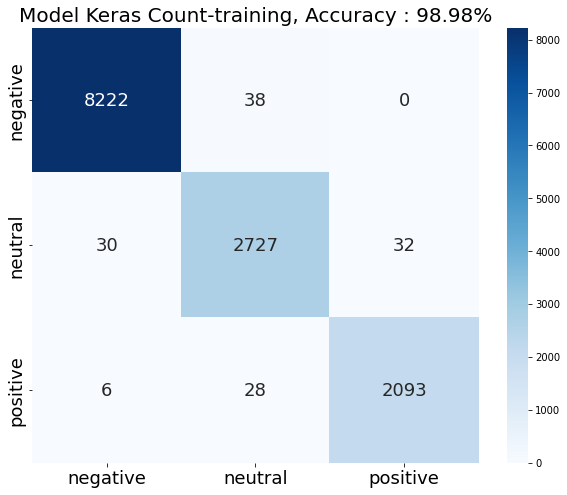

time: 4.38 s (started: 2022-03-02 20:02:07 +00:00)


In [ ]:

# Predict on Training Data
predictions = model.predict(X_train)

# Plot Model Scores

original_data = y_train
predicted_data = np.argmax(predictions, axis=1)


keras_m1_scores_train = plot_model_scores(model_name=model_name+"-training", original_data = original_data,predicted_data = predicted_data)

Performance scores for model : Keras Count-validation



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  Keras Count-validation       1464    77.596  77.596     77.404    77.479

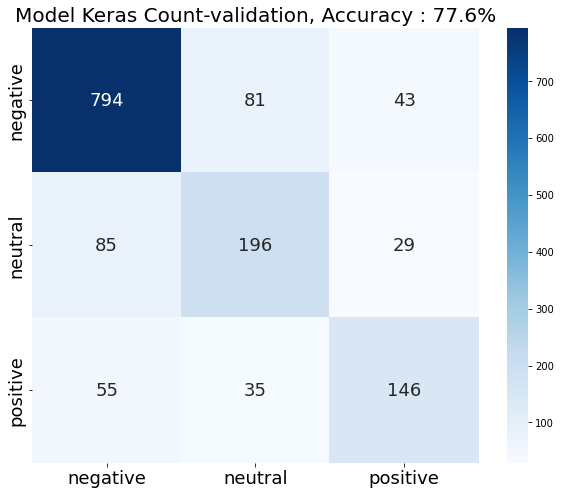

time: 765 ms (started: 2022-03-02 20:02:11 +00:00)


In [ ]:

# Predict on Test Data
predictions = model.predict(X_test)

# Plot Model Scores

original_data = y_test
predicted_data = np.argmax(predictions, axis=1)


keras_m1_scores_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)

 **Observations - NLP With TensorFlow/Keras - - with Count Vectorizer features**

* Very good traning scores, And test score is 77%. But model overfit a lot. 


### **Model 2 - NLP With TensorFlow/Keras - with Tf_Idf Vectorizer features**



Build input features with Tensorlow Keras Layers TextVectorization

Tf_idf Vectorizer  - `output_mode:tf_idf` - "tf_idf": Like "multi_hot", but the TF-IDF algorithm is applied to find the value in each token slot. For "int" output, any shape of input and output is supported. For all other output modes, currently only rank 1 inputs (and rank 2 outputs after splitting) are supported.

In [ ]:

# Build TextVectorization for count
idf_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_features_words, standardize=None,split='whitespace', output_mode='tf_idf')
idf_vectorize_layer.get_config()


{'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 3000,
 'name': 'text_vectorization_25',
 'ngrams': None,
 'output_mode': 'tf_idf',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': None,
 'trainable': True,
 'vocabulary': None}

time: 11.6 ms (started: 2022-03-02 20:02:12 +00:00)


In [ ]:

# Adapt the Text Vectorization layer to the training dataset
idf_vectorize_layer.adapt(X_train)
vectorized_text = idf_vectorize_layer(X_train)
print('Training Data Shape : ',vectorized_text.shape)

vectorized_text_validation = idf_vectorize_layer(X_test)
print('Training Data Shape : ',vectorized_text_validation.shape)



Training Data Shape :  (13176, 3000)
Training Data Shape :  (1464, 3000)
time: 16.9 s (started: 2022-03-02 20:02:12 +00:00)


**Create Model**

In [ ]:


# Create Model

model_name="Keras TF-IDF"
model = Sequential([
      tf.keras.Input(shape=(1,), dtype=tf.string),
      count_vectorize_layer,
      Dense(16, activation="relu"),
      Dense(3, activation="softmax")

])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile Model

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

# Model Summary

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_24 (Text  (None, 3000)             0         
 Vectorization)                                                  
                                                                 
 dense_68 (Dense)            (None, 16)                48016     
                                                                 
 dense_69 (Dense)            (None, 3)                 51        
                                                                 
Total params: 48,067
Trainable params: 48,067
Non-trainable params: 0
_________________________________________________________________
time: 102 ms (started: 2022-03-02 20:02:29 +00:00)


**Train Model**

In [ ]:
custom_callbacks=CustomCallback(fraction=.25)

E=10

# Train Model

history = model.fit(x=X_train, y=y_train_e,validation_data=(X_test,y_test_e), epochs=E,
                    callbacks=[custom_callbacks] ,verbose=1)


Training Started with fraction : 0.25

Epoch 1/10
412/412 [==============================] - 12s 30ms/step - loss: 0.5719 - accuracy: 0.7668 - val_loss: 0.5053 - val_accuracy: 0.8005
Epoch 2/10
412/412 [==============================] - 13s 31ms/step - loss: 0.3848 - accuracy: 0.8519 - val_loss: 0.5397 - val_accuracy: 0.7889
Epoch 3/10
412/412 [==============================] - 12s 29ms/step - loss: 0.2931 - accuracy: 0.8895 - val_loss: 0.6208 - val_accuracy: 0.7978

Updating new Learning rate -> At epoch : 3, lr : 0.009999999776482582 change to new lr : 0.007499999832361937 with fraction : 0.25

Epoch 4/10
412/412 [==============================] - 12s 29ms/step - loss: 0.2044 - accuracy: 0.9224 - val_loss: 0.7109 - val_accuracy: 0.7821
Epoch 5/10
412/412 [==============================] - 12s 29ms/step - loss: 0.1539 - accuracy: 0.9451 - val_loss: 0.7983 - val_accuracy: 0.7876
Epoch 6/10
412/412 [==============================] - 12s 30ms/step - loss: 0.1225 - accuracy: 0.9558 - val

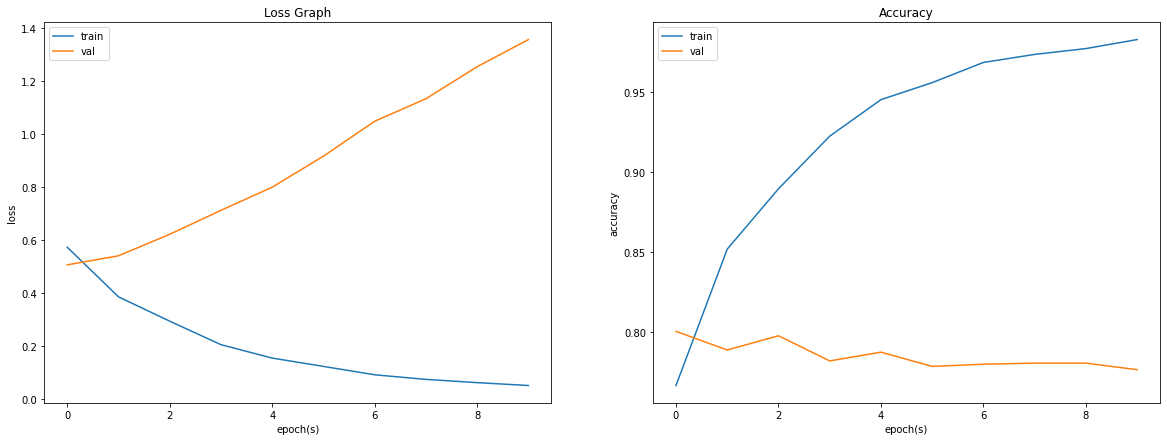

time: 470 ms (started: 2022-03-02 20:04:31 +00:00)


In [ ]:
# Plot Model Performance 
plot_model_performance(history=history)

Performance scores for model : Keras TF-IDF-training



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  Keras TF-IDF-training      13176    98.687  98.687     98.685    98.685

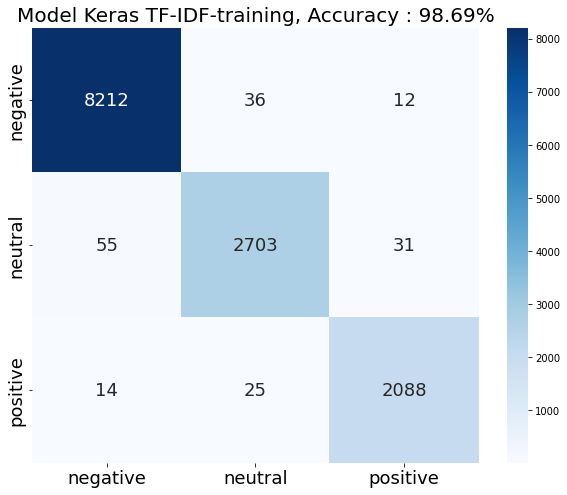

time: 4.31 s (started: 2022-03-02 20:04:32 +00:00)


In [ ]:
# Predict on Training Data
predictions = model.predict(X_train)


# Plot Model Scores

original_data = y_train
predicted_data = np.argmax(predictions, axis=1)

keras_m2_scores_train = plot_model_scores(model_name=model_name+"-training", original_data = original_data,predicted_data = predicted_data)

Performance scores for model : Keras TF-IDF-validation



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0  Keras TF-IDF-validation       1464    77.664  77.664     77.795    77.705

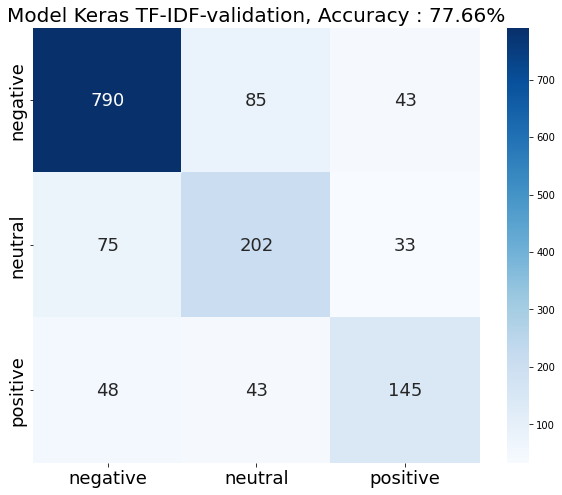

time: 793 ms (started: 2022-03-02 20:04:36 +00:00)


In [ ]:
# Predict on Test Data
predictions = model.predict(X_test)


# Plot Model Scores

original_data = y_test
predicted_data = np.argmax(predictions, axis=1)

keras_m2_scores_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)

 **Observations - NLP With TensorFlow/Keras - - with TF-IDF Vectorizer features**

* Very good traning scores, And test score is 77%. But model overfit a lot. 


## Check Performance Scores for all models 

Check Accuracy scores for all models and pick the best model for Futher Performance Tuning

In [ ]:
# Concat all model scores 
print("Model Scores - Vader Sentiment Analysis")
print()
display(pd.concat([m1_scores,m2_scores]))
print()

print("Model Scores - Naive Bayes Sentiment Analysis")

print()
display(pd.concat([nb_m1_scores_train,nb_m1_scores_test,nb_m2_scores_train,nb_m2_scores_test]))
print()


print("Model Scores - Keras Deep Learning Sentiment Analysis")

print()
display(pd.concat([keras_m1_scores_train, keras_m1_scores_test, keras_m2_scores_train, keras_m2_scores_test]))
print()




Model Scores - Vader Sentiment Analysis



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0    Vader - original text      14640    48.989  48.989     69.370     51.42
0  Vader - normalized text      14640    54.911  54.911     69.991     57.14


Model Scores - Naive Bayes Sentiment Analysis



Model Name  # Records  Accuracy  Recall  Precision  \
0    Naive Bayes Count-training      13176    82.157  82.157     81.625   
0  Naive Bayes Count-validation       1464    77.596  77.596     76.770   
0    Naive Bayes TFIDF-training      13176    76.283  76.283     79.116   
0  Naive Bayes TFIDF-validation       1464    73.907  73.907     76.154   

   F1_score  
0    81.732  
0    76.960  
0    72.836  
0    69.644


Model Scores - Keras Deep Learning Sentiment Analysis



Model Name  # Records  Accuracy  Recall  Precision  F1_score
0     Keras Count-training      13176    98.983  98.983     98.983    98.983
0   Keras Count-validation       1464    77.596  77.596     77.404    77.479
0    Keras TF-IDF-training      13176    98.687  98.687     98.685    98.685
0  Keras TF-IDF-validation       1464    77.664  77.664     77.795    77.705


time: 41.1 ms (started: 2022-03-02 20:04:37 +00:00)


**Observations on Model performance**

Tensorflow NN NLP Model scores are good but both feature models overfit lot. 

Lets optimize model futher


## Keras Model - Performance Tuning & Avoid Overfitting 

and achieve final accuracy score >= 80% both for training & validation

**Adding Features to avoid overfitting** 


1.   Weight Regularizers
2.   Dropouts 
3.   Adding Multiple hidden layers
4.   Dynamic Learning Rate
5.   Early Stopping to avoid overfitting




**Method to create model using dynamic parameters, so we can run multiple experiments**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting


# Create a model with option of adding dropouts & Weight Regularizers 

def create_model(nodes = 64, layers_to_build=1,weight_reg=False, dropout_reg=False,learning_rate=0.001):

  print(f"create_model - nodes : {nodes}, layers_to_build : {layers_to_build}, weight_reg : {weight_reg}, dropout_reg : {dropout_reg}, learning_rate : {learning_rate}")

  MAX_TOKENS_NUM = 3000 

  # Build TextVectorization for count
  vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=MAX_TOKENS_NUM, standardize=None,split='whitespace', output_mode='count')
  print('get_config', vectorize_layer.get_config())



  # Adapt the Text Vectorization layer to the training dataset
  vectorize_layer.adapt(X_train)
  vectorized_text = vectorize_layer(X_train)
  print('Training Data Shape : ',vectorized_text.shape)

  vectorized_text_validation = vectorize_layer(X_test)
  print('Training Data Shape : ',vectorized_text_validation.shape)



  model = Sequential()

  model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
  model.add(vectorize_layer)

  #Loop and Add multiple layers if reqd
  for i in range(0,layers_to_build):

    node_to_add=nodes//(i+1)

    # Weight Regularizers 
    if weight_reg:
      model.add(Dense(node_to_add,activation="relu",kernel_regularizer=l2(learning_rate), bias_regularizer=l2(learning_rate)))
    else:

      model.add(Dense(node_to_add,activation="relu"))


    # Dropouts 
    if dropout_reg:
      model.add(Dropout(rate=0.5))




  # Output Layer 
  model.add(Dense(3,activation="softmax"))

  opt = tf.keras.optimizers.Adam(learning_rate)

  # Compile 
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # Summary 

  model.summary()

  return model


time: 53.2 ms (started: 2022-03-02 20:04:37 +00:00)


**Method to create model using dynamic parameters, so we can run multiple experiments**

In [ ]:
nodes = 32

def run_experiment(nodes = 16,layers_to_build=1,E=20, weight_reg=False, dropout_reg=False,learning_rate=0.001):

  # custom callbacks 
  custom_callbacks=CustomCallback(fraction=.25)
  # early stop 
  early_stop_cb = tf.keras.callbacks.EarlyStopping(
      monitor='val_accuracy', patience=5, verbose=2, min_delta=0.0001,
      mode='max'
  )

  # Init Model
  model = create_model(nodes,layers_to_build,weight_reg,dropout_reg,learning_rate=learning_rate) 

  
  # train model
  history = model.fit(x=X_train, y=y_train_e,validation_data=(X_test,y_test_e), epochs=E,
                    callbacks=[custom_callbacks,early_stop_cb] ,verbose=1, shuffle=True)

  # Plot Model Performance 
  plot_model_performance(history=history)

  return model

time: 11.4 ms (started: 2022-03-02 20:04:37 +00:00)


#### **Experiment 1**

**No weight regularization or Dropouts**

create_model - nodes : 32, layers_to_build : 1, weight_reg : False, dropout_reg : False, learning_rate : 0.001
get_config {'name': 'text_vectorization_26', 'trainable': True, 'dtype': 'string', 'max_tokens': 3000, 'standardize': None, 'split': 'whitespace', 'ngrams': None, 'output_mode': 'count', 'output_sequence_length': None, 'pad_to_max_tokens': False, 'sparse': False, 'ragged': False, 'vocabulary': None, 'idf_weights': None}
Training Data Shape :  (13176, 3000)
Training Data Shape :  (1464, 3000)
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_26 (Text  (None, 3000)             0         
 Vectorization)                                                  
                                                                 
 dense_70 (Dense)            (None, 32)                96032     
                                                                 
 dense_71

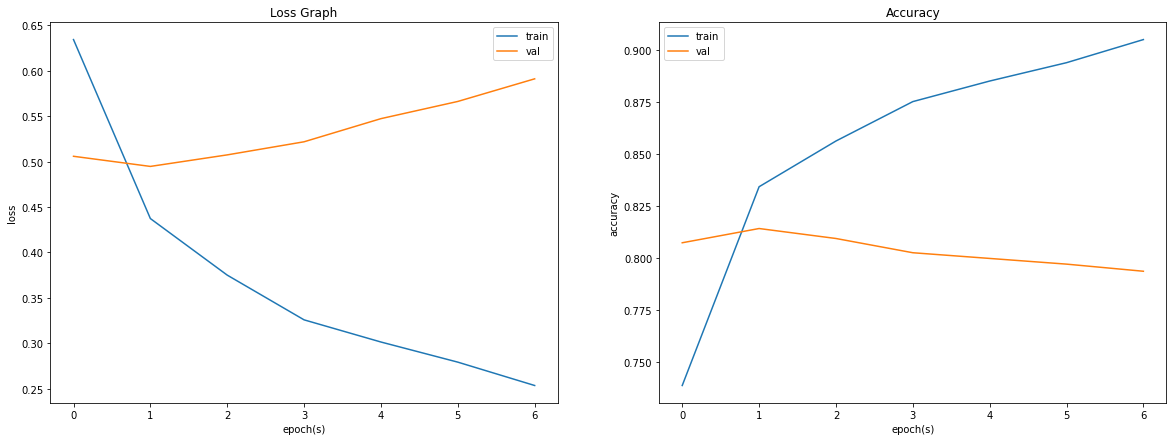

time: 2min 25s (started: 2022-03-02 20:04:37 +00:00)


In [ ]:
# No weight regularization or Dropouts 
model_no_wt_no_drop = run_experiment(nodes = 32,layers_to_build=1,E=20,weight_reg=False,dropout_reg=False,learning_rate=0.001)

**Observation on Experiment 1**

**No weight regularization or Dropouts - Overfit**

* high accuracy score 90% on traning, But validation has only 79% - overfit model.


#### **Experiment 2**


**With weight regularization and Dropouts**

create_model - nodes : 32, layers_to_build : 2, weight_reg : True, dropout_reg : True, learning_rate : 0.001
get_config {'name': 'text_vectorization_28', 'trainable': True, 'dtype': 'string', 'max_tokens': 3000, 'standardize': None, 'split': 'whitespace', 'ngrams': None, 'output_mode': 'count', 'output_sequence_length': None, 'pad_to_max_tokens': False, 'sparse': False, 'ragged': False, 'vocabulary': None, 'idf_weights': None}
Training Data Shape :  (13176, 3000)
Training Data Shape :  (1464, 3000)
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_28 (Text  (None, 3000)             0         
 Vectorization)                                                  
                                                                 
 dense_75 (Dense)            (None, 32)                96032     
                                                                 
 dropout_20

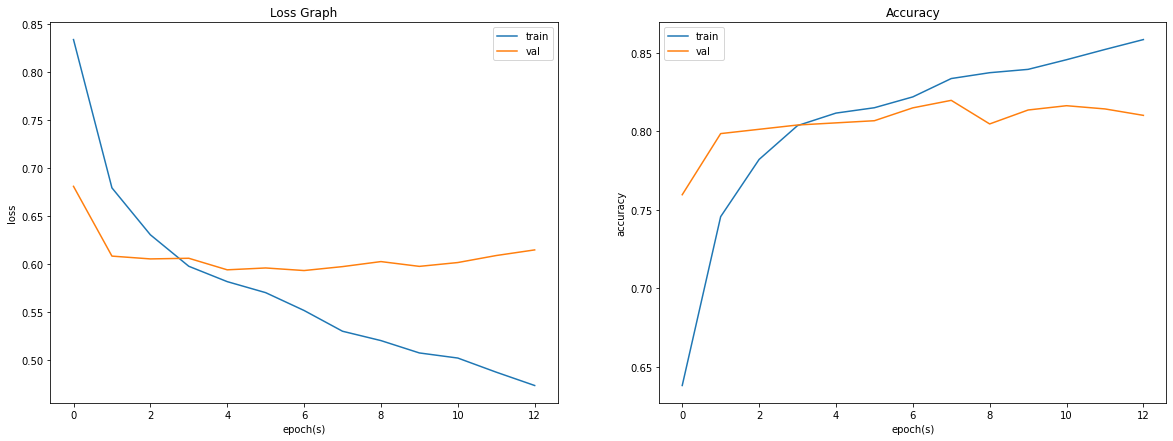

time: 3min 28s (started: 2022-03-02 20:14:14 +00:00)


In [ ]:
model_name="Keras Optimized"
# With weight regularization and with Dropouts 
model_wt_and_drop = run_experiment(nodes = 32,layers_to_build=2, E=20,weight_reg=True,dropout_reg=True,learning_rate=0.001)

Performance scores for model : Keras Optimized-validation



Model Name  # Records  Accuracy  Recall  Precision  \
0  Keras Optimized-validation       1464    80.943  80.943     80.687   

   F1_score  
0    80.739

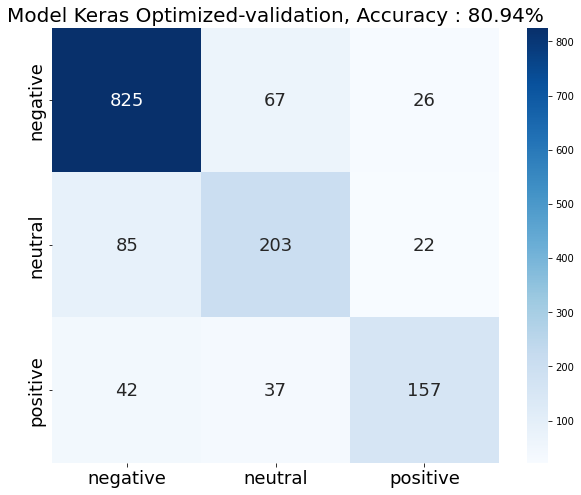

time: 798 ms (started: 2022-03-02 20:10:04 +00:00)


In [ ]:
# Predict on Test Data
predictions = model_wt_and_drop.predict(X_test)


# Plot Model Scores

original_data = y_test
predicted_data = np.argmax(predictions, axis=1)

final_model_test = plot_model_scores(model_name=model_name+"-validation", original_data = original_data,predicted_data = predicted_data)



**With weight regularization and Dropouts** 

* Model generalize well and both traning & testing has 80% accuracy scores
* No overfiting 
* Model has 2 hidden layer with weight regularization and 2 drop out layers

we achieved target accuracy score >= 80% both for training & validation

# **Top 40 Features WordCloud**

## **Count vectorizer - Top 40 Features**

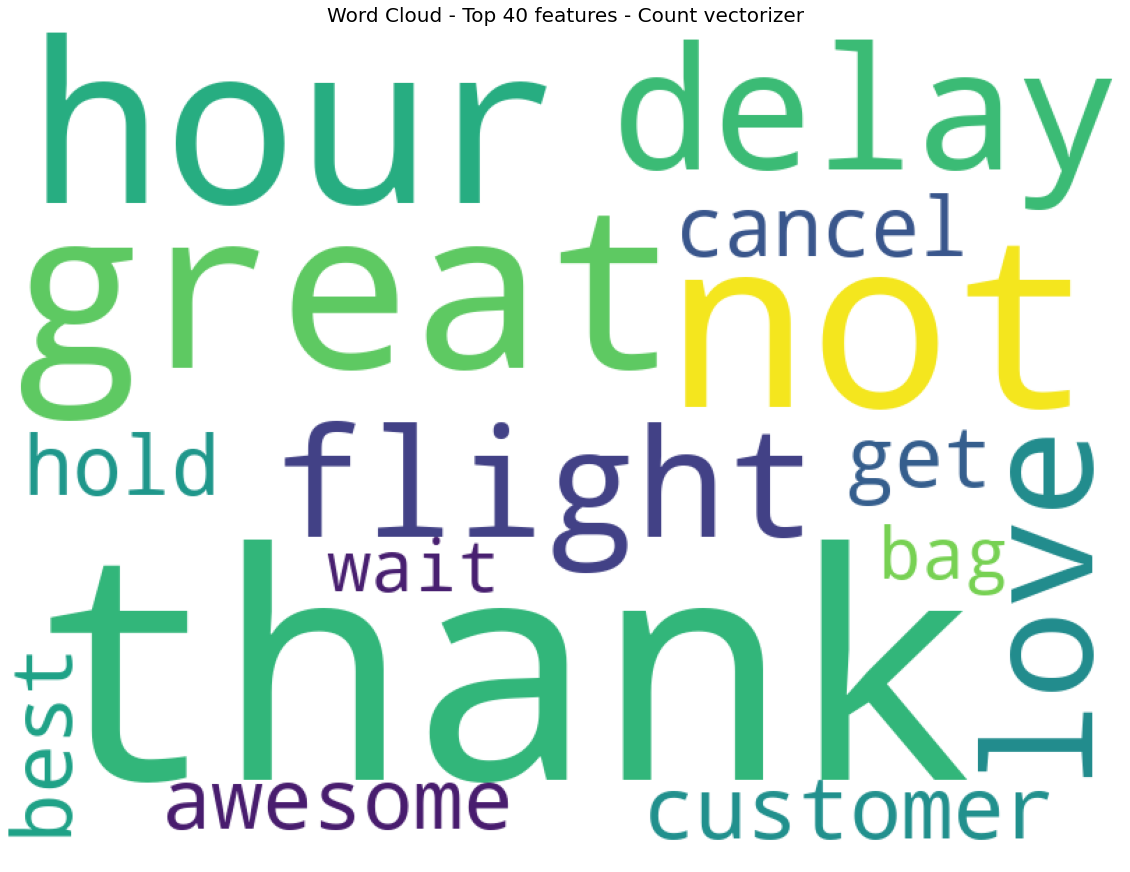

time: 1.01 s (started: 2022-03-02 20:10:05 +00:00)


In [ ]:

all_features = count_vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=forest_count.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    

show_wordcloud(Top_features, 'Top 40 features - Count vectorizer', countBarChart=False)

**Observations on Count vectorizer - Top Features**

Top words on Count vectorizer are thank, great, not, cancel, flight 

## **TF-IDF vectorizer - Top 40 Features**

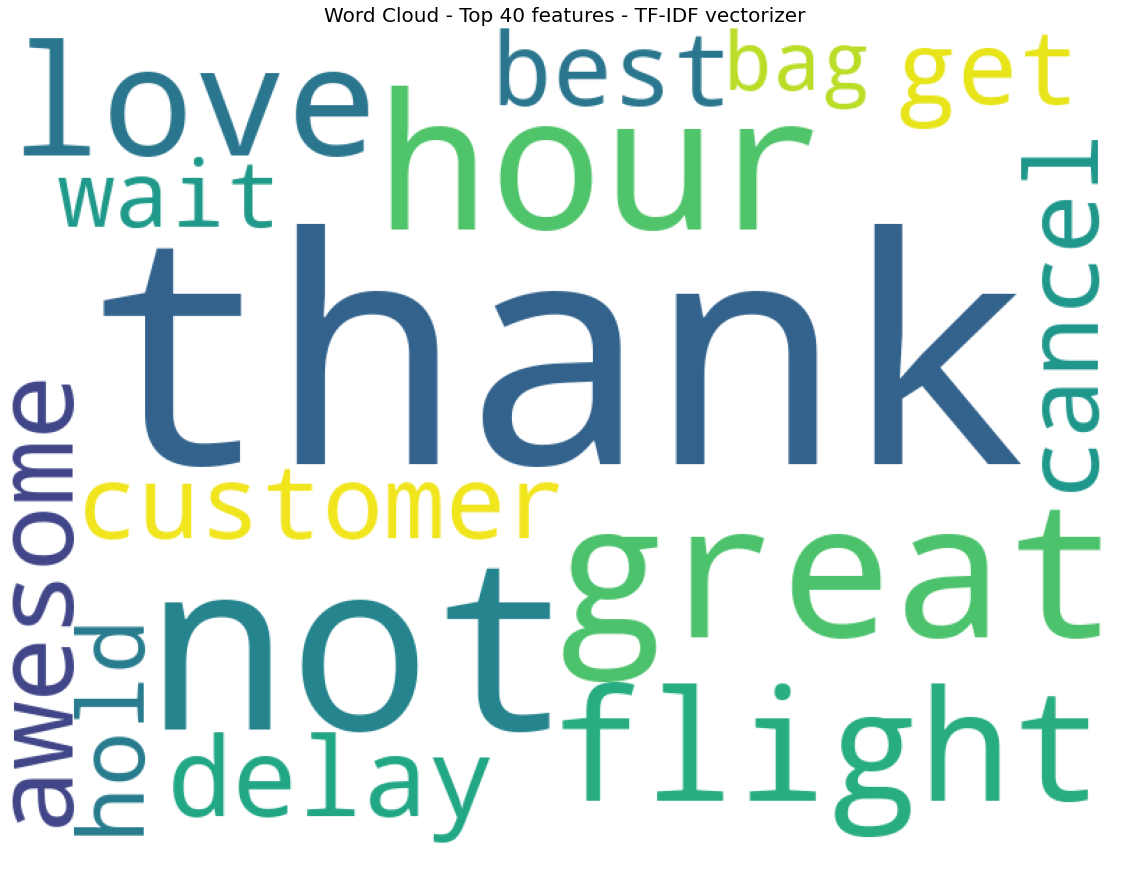

time: 1.04 s (started: 2022-03-02 20:10:06 +00:00)


In [ ]:

all_features = count_vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=forest_idf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  

show_wordcloud(Top_features, 'Top 40 features - TF-IDF vectorizer', countBarChart=False)

 **Observations on TF-IDF vectorizer - Top Features**


Top words on Count vectorizer are thank, great, not, cancel, flight, love, delay

# **Summary**

* DNN model with With weight regularization and with Dropouts generalize well and predicts sentiment with 80% accuracy 

**Observation  - From negative tweets**

Total negative tweet words - 9178

Top words we see in word cloud are airline names, flight, not, get, cancelled, service, hold.


**Observation  - From positive tweets**

Total positive tweet words - 2363

Top words we see in word cloud are airline names, flight, thanks, thank, great, love


**Observation  - From neutral tweets**

Total neutral tweet words - 3099

Top words we see in word cloud are airline names, flight, get, need, please not, help 


**Critical feature for sentiment analysis**

1.   Negative tweets has more words and tweet length compared to postive and neutral
2.   On Avg Every tweet has 20 words and above for negative tweets
3.   Postive and Neutral has avg 10 to 15 words 

**Observations on Negative reason by Airlines**

* United has most negative reasons across all types, Followed by US Airways 
* Delta, Southwest and Virgin America has least negative reasons 
* Lost luggage, Flight attendent Complaints, Customer service issues are top negative issues reported for both United and US Airways